# Entire Pipeline

Install sdia stats and tools in same env before running this notebook

In [34]:
from silac_dia_tools.pipeline_refactored.pipeline import Pipeline as pileline
from sdia_stats.preprocessing import imputation 
from sdia_stats.preprocessing import normalize_samples
from sdia_stats.preprocessing import filter_contams_and_non_valid_rows
from sdia_stats.qc import normalization_qc
from sdia_stats.statistics import ttest
from sdia_stats.visualization.interpret_ttest_results import loop_and_plot_results
import pandas as pd
import os
os.environ['OUTDATED_IGNORE'] = '1'

## Process report.tsv

In [21]:
path = 'G:/My Drive/Data/data/POC5/'
meta = 'G:/My Drive/Data/data/POC5/meta.csv'
normalization_groups = {'control': ['DFO','FAC,','4EGI', 'ARV825', 'Gu', 'Len']
              }
ttest_groups = {
    "FAC vs control": ('FAC','control'),
    "DFO vs control": ('DFO','control')
    
    }

In [ ]:
normalization_groups = {'54-': ['54+'], 
          '68-':['68+'],
          '72-':['72+']
              }
ttest_groups = {
    "54": ('54+','54-'),
    "68": ('68+','68-'),
    "72": ('72+','72-')
    
    }

In [41]:
path = 'G:/My Drive/Data/data/20240306 eIF 5 lines/3D new pipeline/'
meta = 'G:/My Drive/Data/data/20240306 eIF 5 lines/3D new pipeline/meta.csv'
normalization_groups = {'3D_08-': ['3D_08+'], 
                        '3D_28-': ['3D_28+'],
                        
                        'G3_28-': ['G3_28+'],
                        'G3_08-': ['G3_08+'],
                        'G2_28-': ['G2_28+'],
                        'G2_08-': ['G2_08+']
          
              }
ttest_groups = {
    "3D08": ('3D08+','3D08-'),
    "3D28": ('3D28+','3D28-'),

    
    }

### H ref normalization

In [3]:
pipeline = pileline( f'{path}', 'test_params.json', contains_reference = True, method = 'dynamic_dia_sis', pulse_channel="M", meta='meta.csv')
pipeline.execute_pipeline()


Metadata added, looking for the following file: meta.csv
CSV file 'meta.csv' found in G:/My Drive/Data/data/POC5/
Beginning import report.tsv


Estimated loading of report.tsv based on file size:  98%|█████████████▋| 22/22.501237944444444 [01:34<00:02,  4.20s/it]C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Estimated loading of report.tsv based on file size: 27it [01:54,  4.25s/it]                                            


Finished import
Time taken for import: 115.18250250816345 seconds
Formatting SILAC channels
Calculating SILAC ratios based on Ms1.Translated and Precursor.Translated
Rolling up to protein level


Computing protein level ratios for each run: 100%|█████████████████████████████████████| 21/21 [01:02<00:00,  3.00s/it]


Calculating adjusted intensities using reference
Calculating adjusted intensities using reference
Folder already exists at G:/My Drive/Data/data/POC5/protein_groups
Outputing normalized protein intensities to G:/My Drive/Data/data/POC5//protein_groups
Folder already exists at G:/My Drive/Data/data/POC5/protein_groups
Outputing normalized protein intensities to G:/My Drive/Data/data/POC5//protein_groups
Time taken to generate protein groups: 91.90325951576233 seconds
Folder already exists at G:/My Drive/Data/data/POC5/preprocessing
Folder already exists at G:/My Drive/Data/data/POC5/reports
Folder already exists at G:/My Drive/Data/data/POC5/reports
Folder already exists at G:/My Drive/Data/data/POC5/reports


# dynamic silac

In [3]:
pipeline = pileline( f'{path}', 'test_params.json', contains_reference = False, method = 'dynamic_silac', pulse_channel="M", meta='meta.csv')
pipeline.execute_pipeline()

Metadata added, looking for the following file: meta.csv
CSV file 'meta.csv' found in G:/My Drive/Data/data/20240410 SRP AID/
Beginning import report.tsv


Estimated loading of report.tsv based on file size:  96%|█████████████▍| 21/21.902557805555553 [01:14<00:03,  3.57s/it]C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Estimated loading of report.tsv based on file size: 26it [01:31,  3.52s/it]                                            


Finished import
Time taken for import: 91.77735948562622 seconds
Calculating SILAC ratios based on Ms1.Translated and Precursor.Translated
Rolling up to protein level


Computing protein level ratios for each run: 100%|█████████████████████████████████████| 18/18 [00:16<00:00,  1.10it/s]


Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/dlfq
Starting directLFQ analysis.
reformatting input file, for large files this might take a while.


2024-04-21 14:41:48,787 - directlfq.utils - INFO - using input type diann_precursors


Performing sample normalization.


2024-04-21 14:41:58,512 - directlfq.protein_intensity_estimation - INFO - 7178 lfq-groups total


Estimating lfq intensities.


2024-04-21 14:42:03,660 - directlfq.protein_intensity_estimation - INFO - lfq-object 0
2024-04-21 14:42:05,025 - directlfq.protein_intensity_estimation - INFO - lfq-object 100
2024-04-21 14:42:08,242 - directlfq.protein_intensity_estimation - INFO - lfq-object 200
2024-04-21 14:42:10,672 - directlfq.protein_intensity_estimation - INFO - lfq-object 300
2024-04-21 14:42:12,550 - directlfq.protein_intensity_estimation - INFO - lfq-object 400
2024-04-21 14:42:14,925 - directlfq.protein_intensity_estimation - INFO - lfq-object 500
2024-04-21 14:42:17,074 - directlfq.protein_intensity_estimation - INFO - lfq-object 600
2024-04-21 14:42:19,255 - directlfq.protein_intensity_estimation - INFO - lfq-object 700
2024-04-21 14:42:21,639 - directlfq.protein_intensity_estimation - INFO - lfq-object 800
2024-04-21 14:42:23,453 - directlfq.protein_intensity_estimation - INFO - lfq-object 900
2024-04-21 14:42:25,220 - directlfq.protein_intensity_estimation - INFO - lfq-object 1000
2024-04-21 14:42:27,12

Writing results files.
Analysis finished!
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/protein_groups
Time taken to generate protein groups: 198.845299243927 seconds
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/preprocessing
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports
Folder already exists at G:/My Drive/Data/data/20240410 SRP AID/reports


# QC norm vs unnorm

C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-26 14:43:41,350 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-26 14:43:41,416 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\minicon

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples 

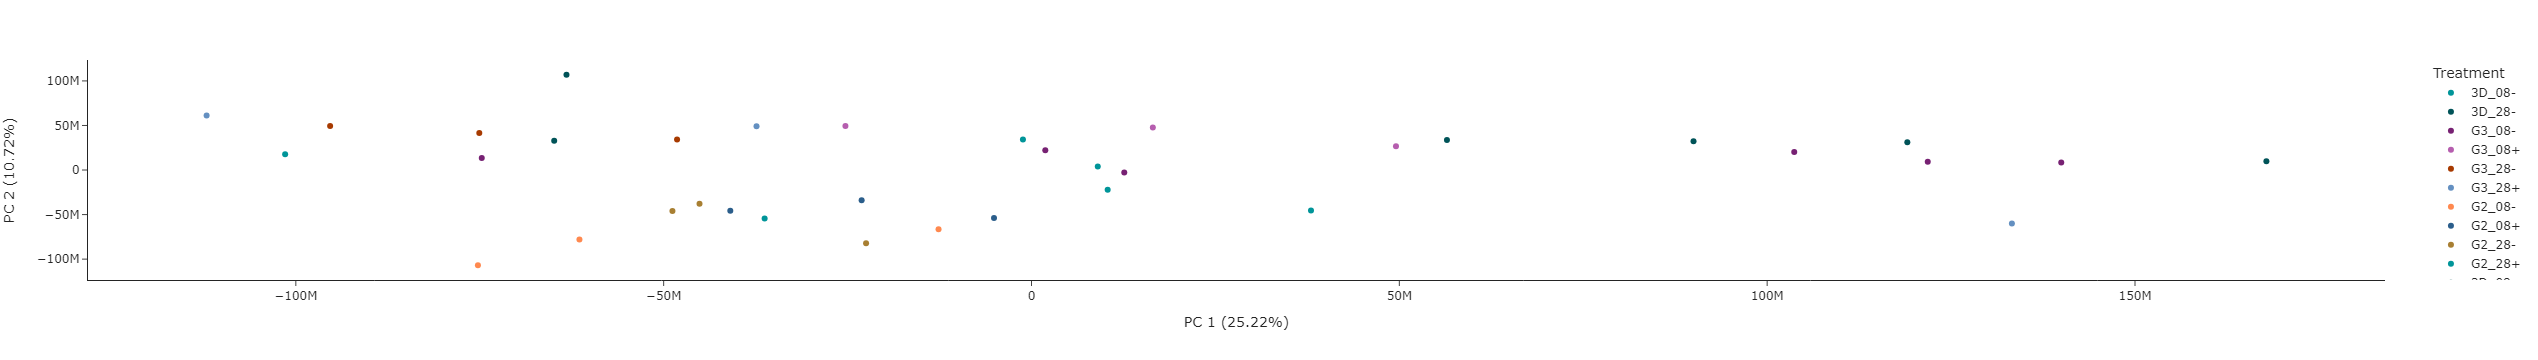

NSP


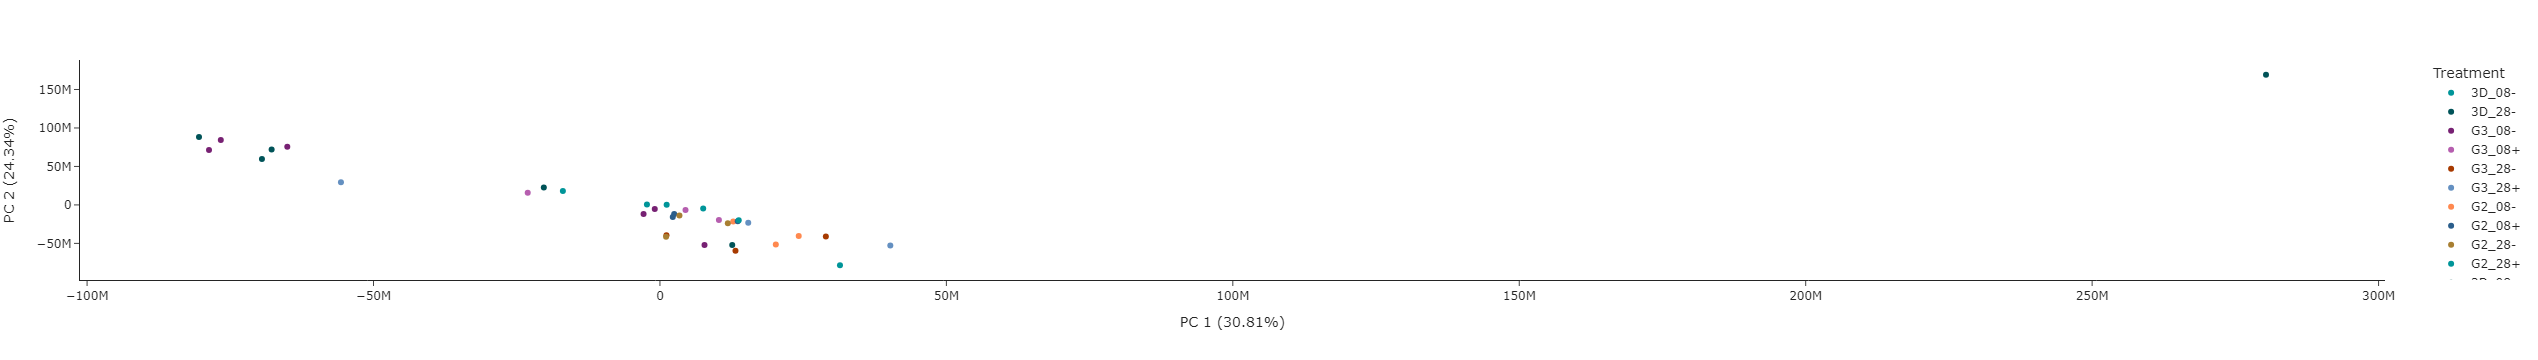

Heavy channel


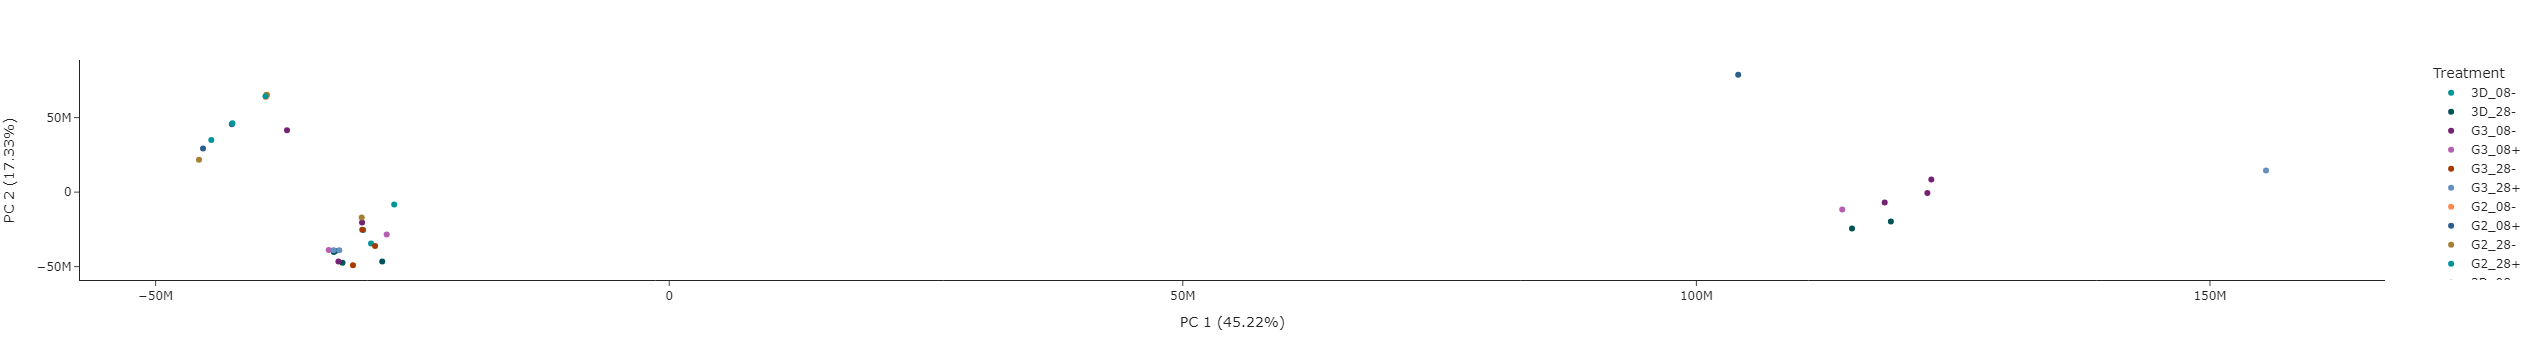

In [36]:
#normalization_qc.pca(path,meta, '_unnorm')
normalization_qc.pca(path,meta, '')
#normalization_qc.pca(path,meta, '_lfq')


C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-26 14:47:15,925 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-26 14:47:15,989 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\minicon

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples 

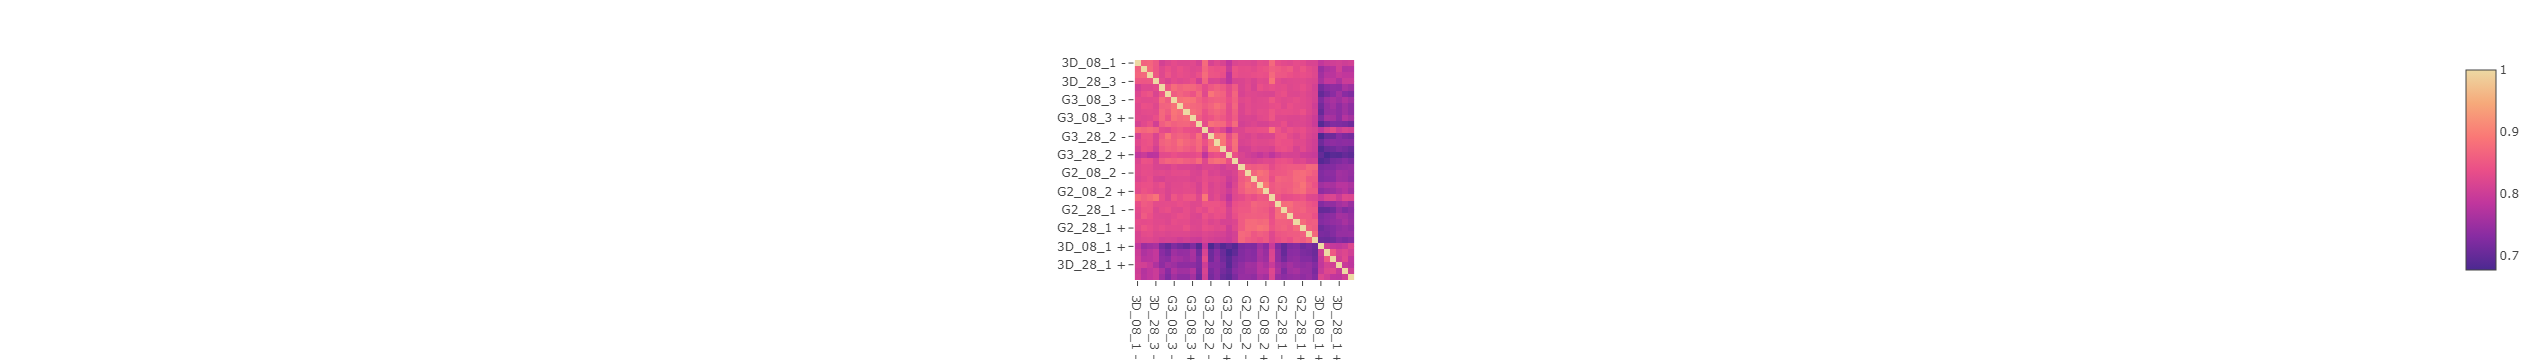

NSP


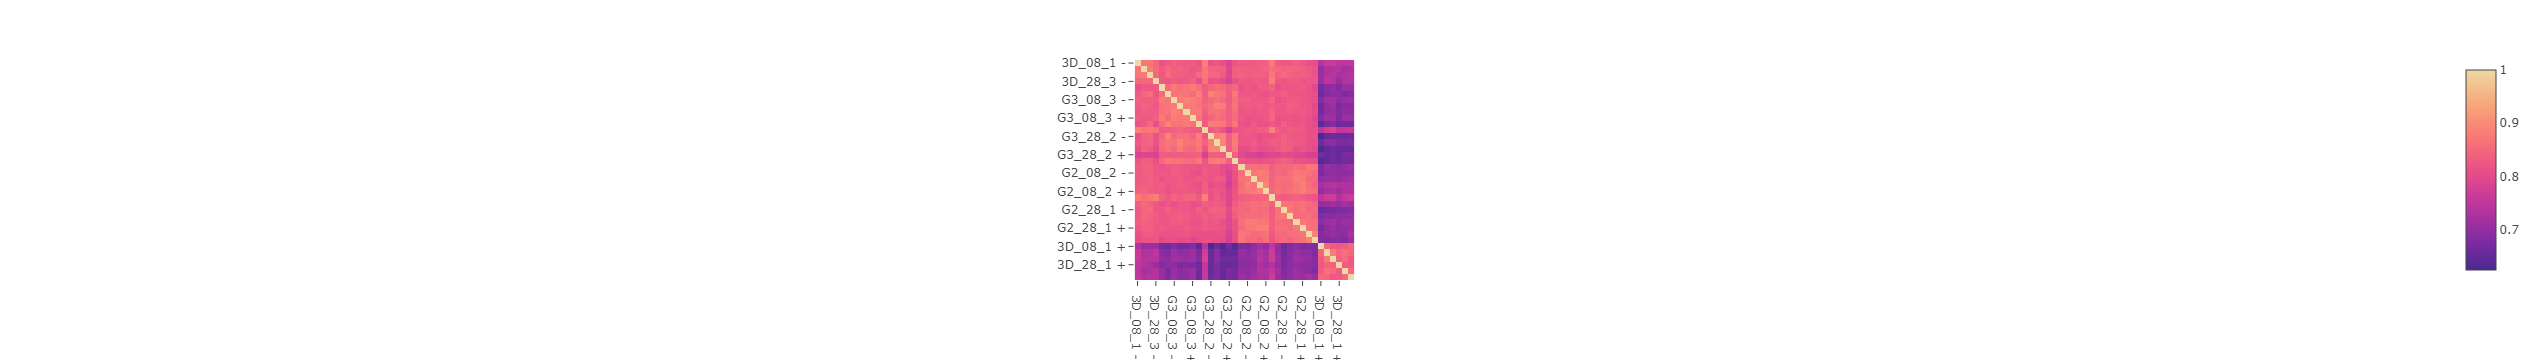

Heavy channel


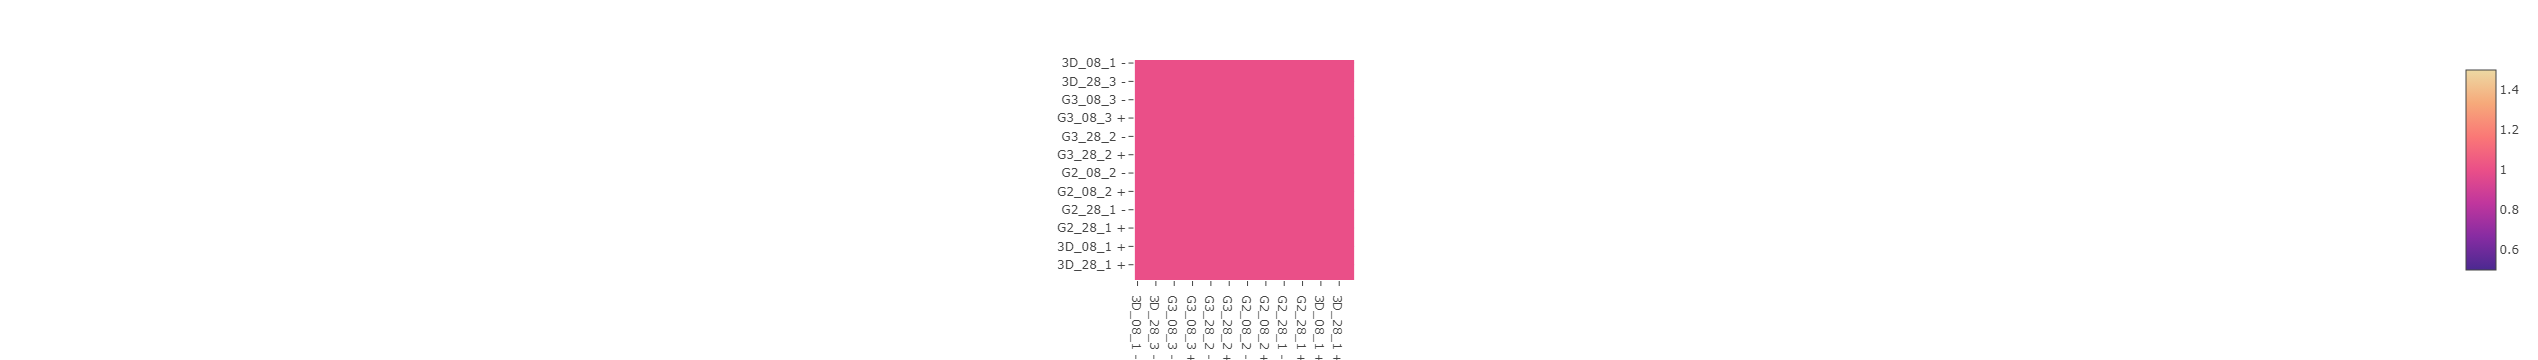

In [37]:
#normalization_qc.correlation(path,meta, '_unnorm')
normalization_qc.correlation(path,meta, '')
#normalization_qc.correlation(path,meta, '_lfq')

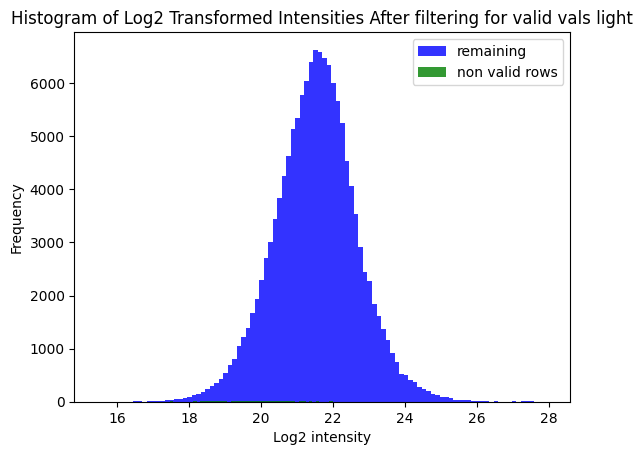

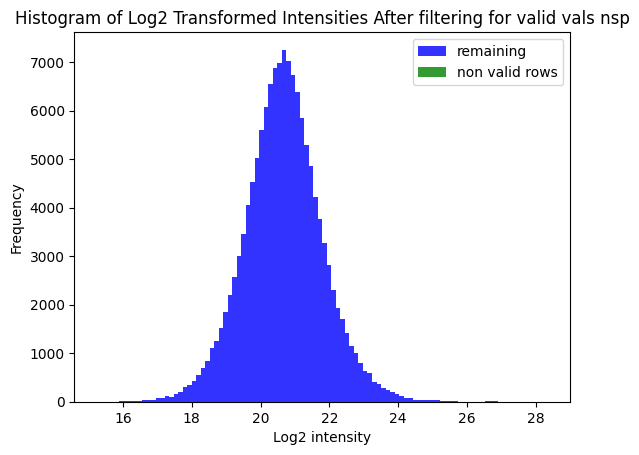

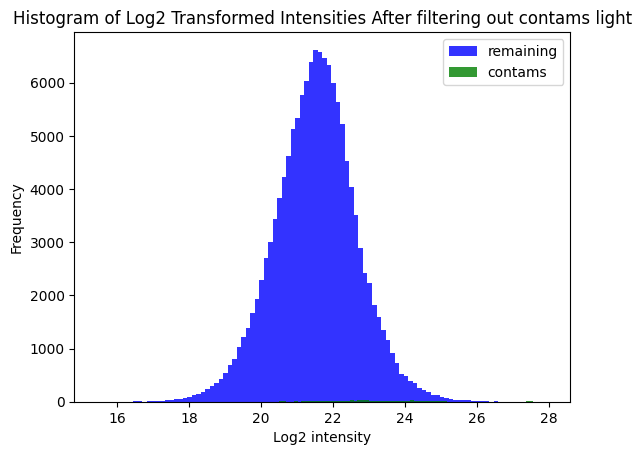

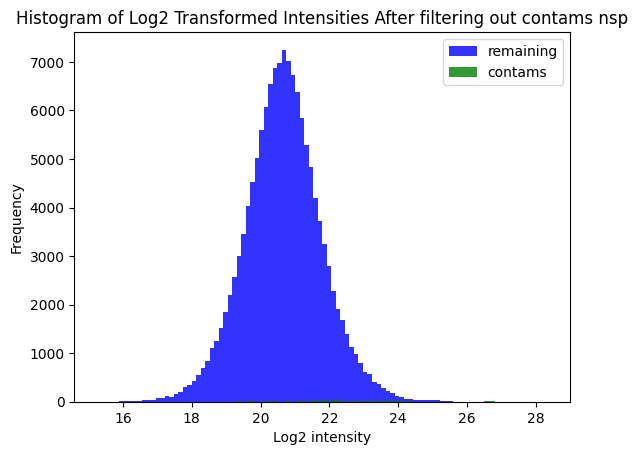

Folder reports already exists at G:/My Drive/Data/data/20240306 eIF 5 lines/3D new pipeline//protein_groups/../statistics


In [42]:
filter_contams_and_non_valid_rows.filter_protein_intensities(path, meta)

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


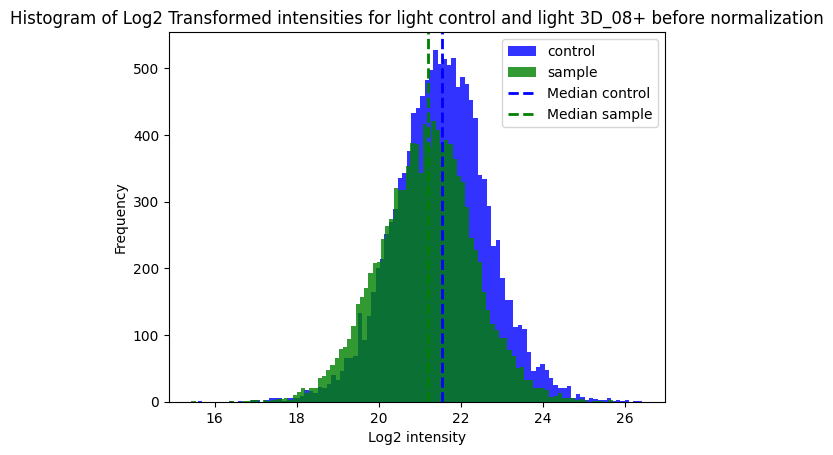

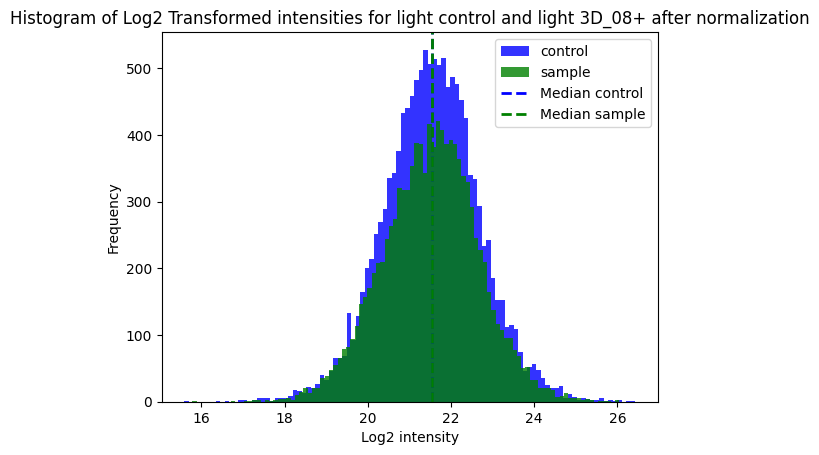

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


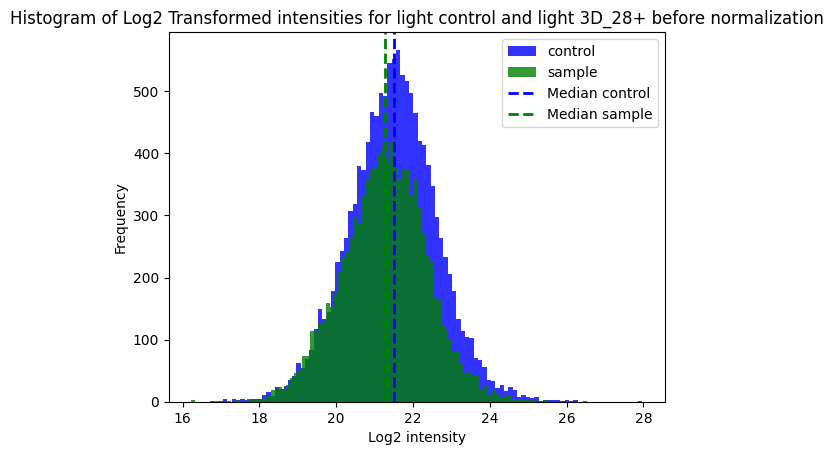

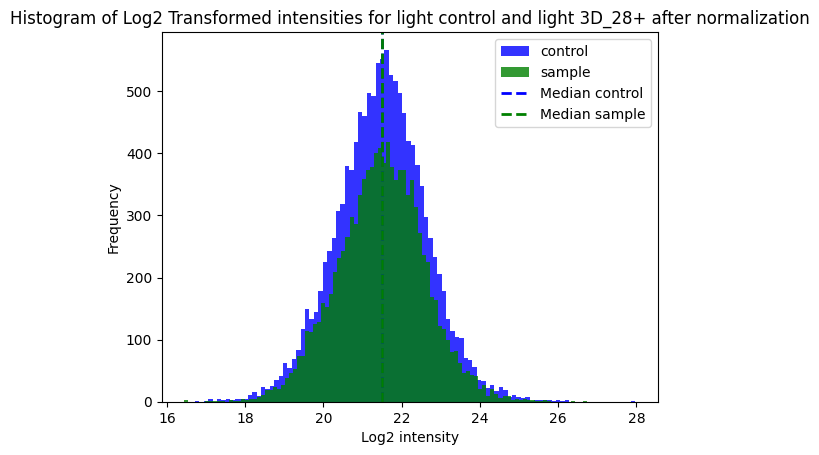

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


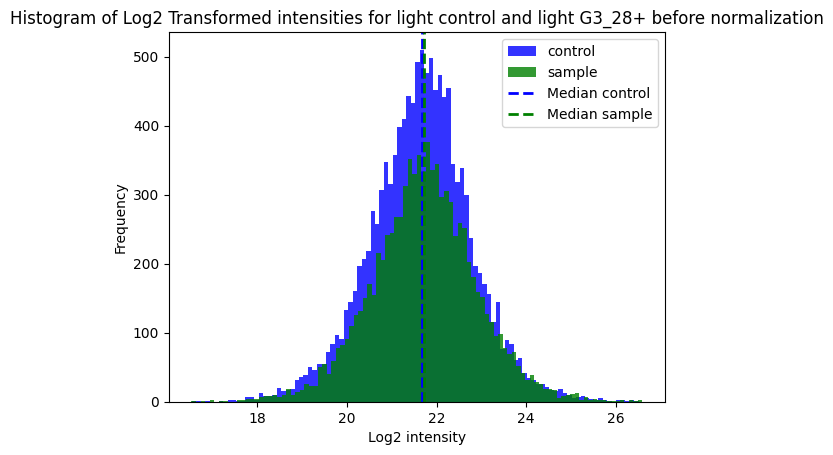

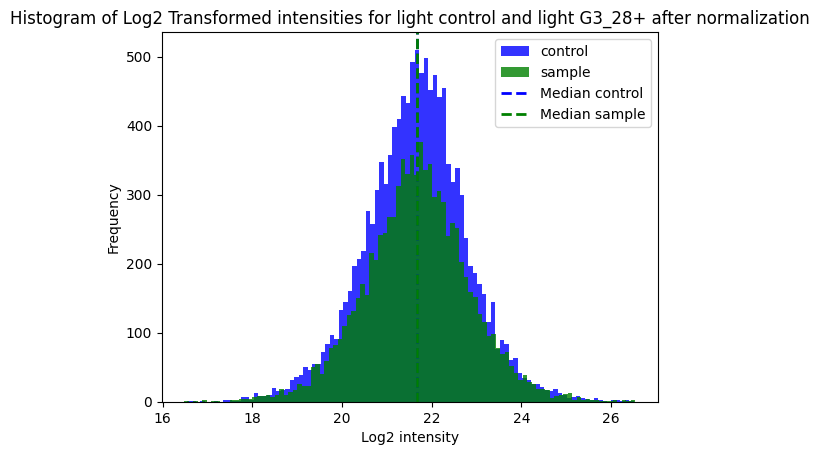

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


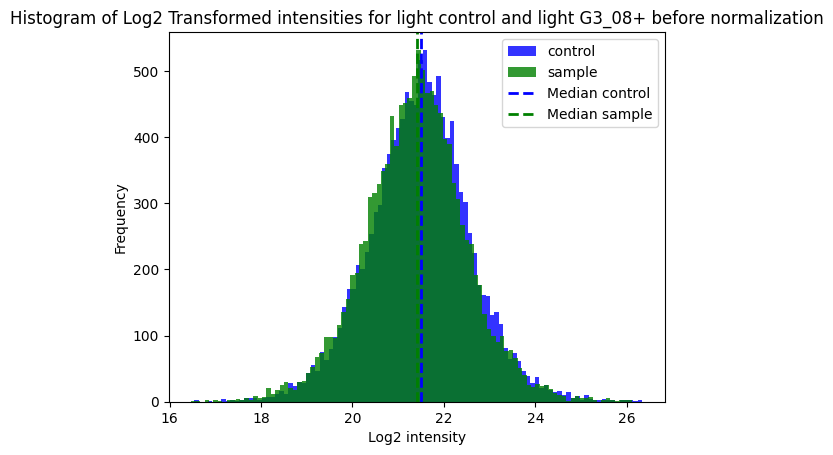

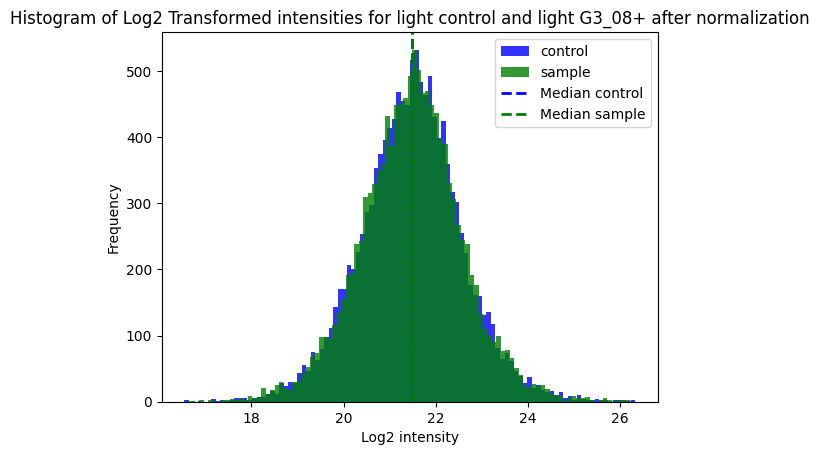

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


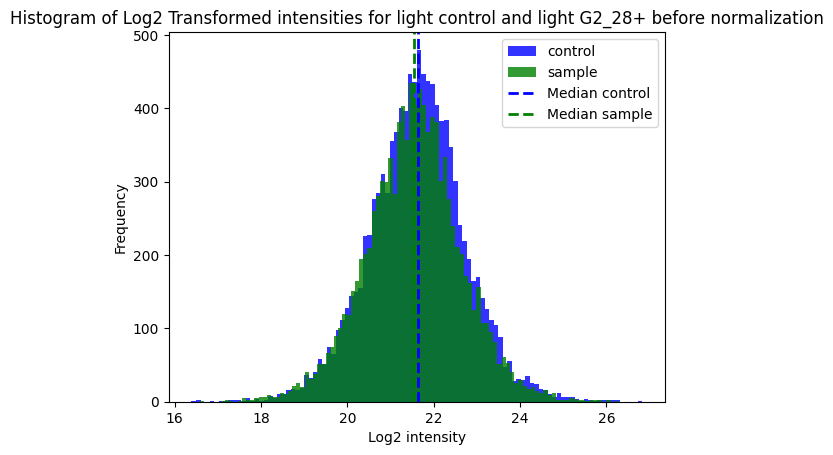

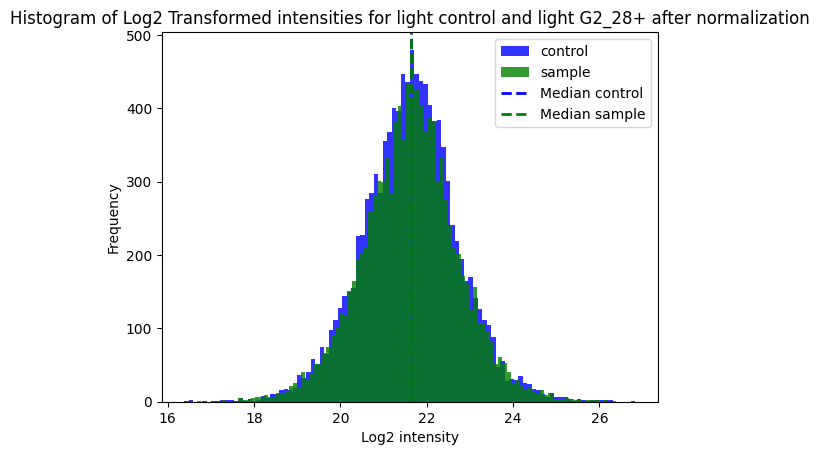

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


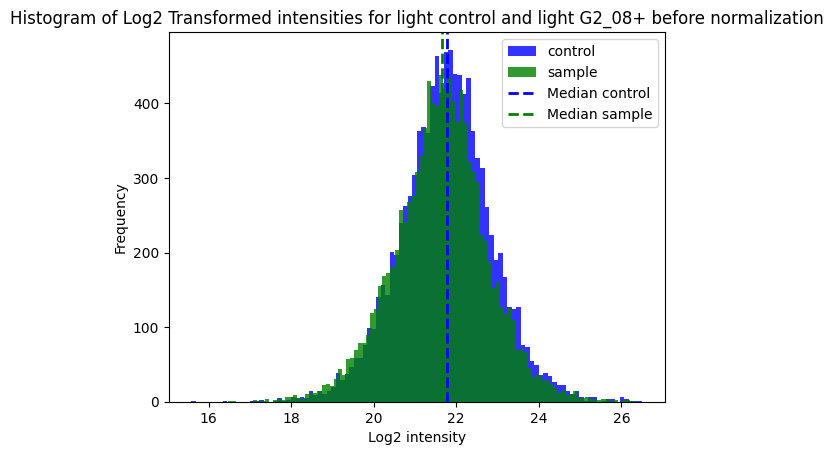

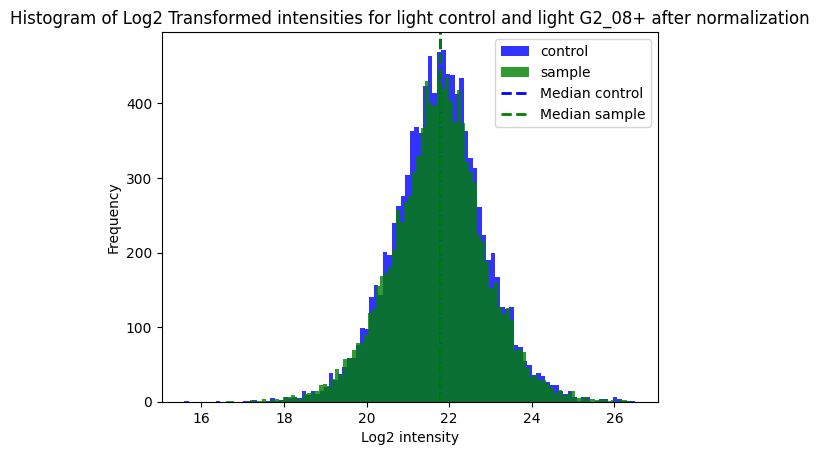

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run',

[('3D_08-', '3D_08+', 0.3452689566849685), ('3D_28-', '3D_28+', 0.21139407321242487), ('G3_28-', 'G3_28+', -0.04999124777973307), ('G3_08-', 'G3_08+', 0.09501579139258354), ('G2_28-', 'G2_28+', 0.08598043142634992), ('G2_08-', 'G2_08+', 0.11249099162964171)]


 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']
ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


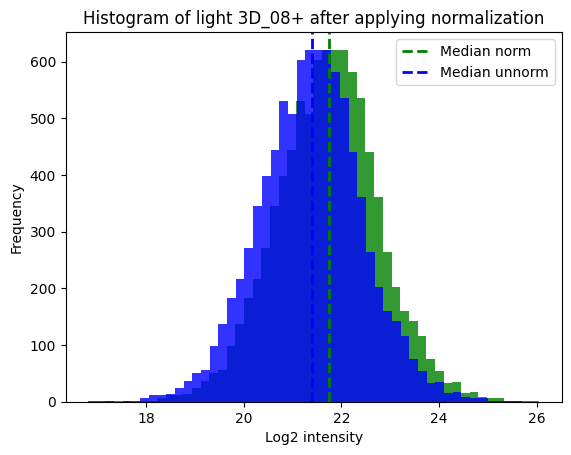

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


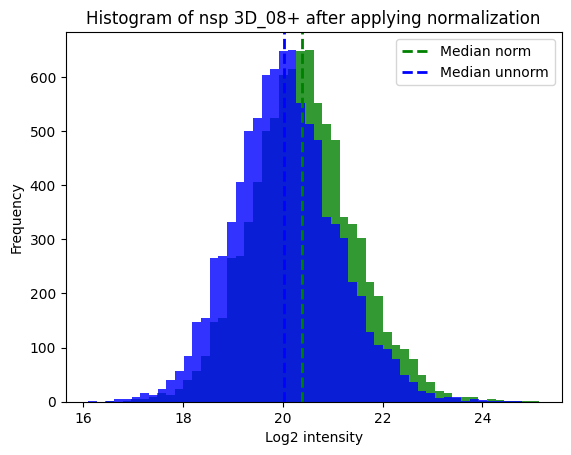

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


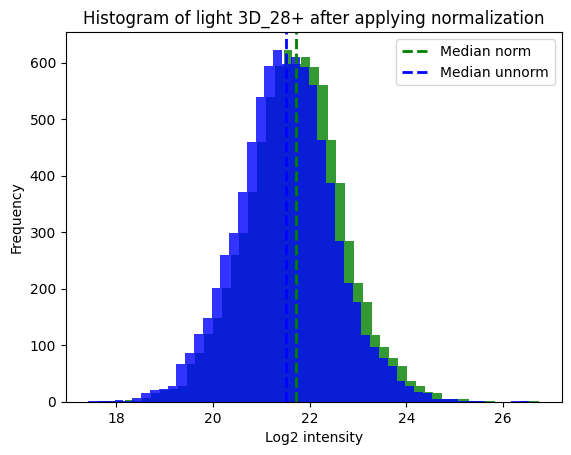

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


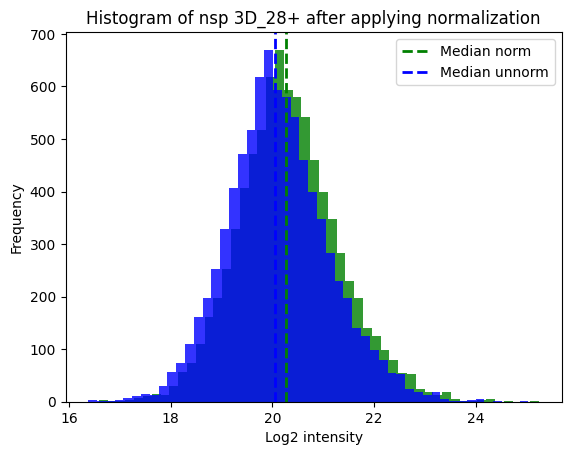

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


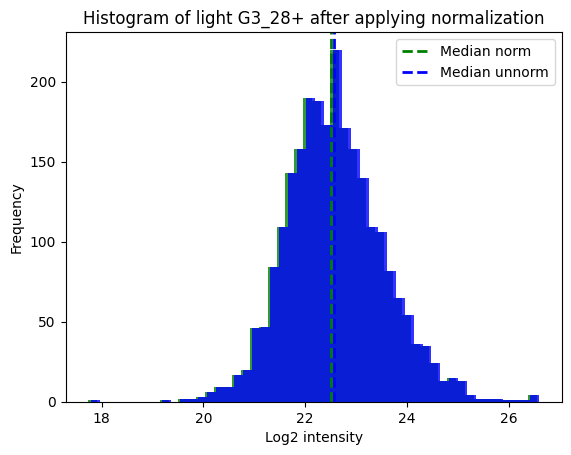

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


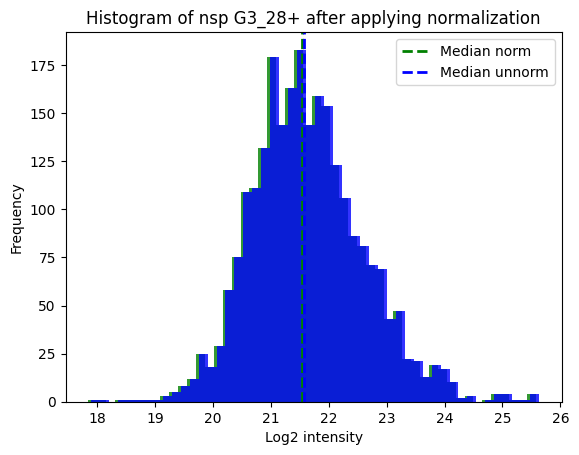

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


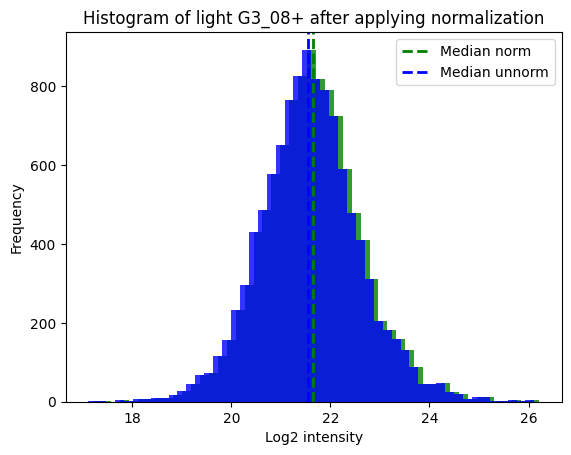

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


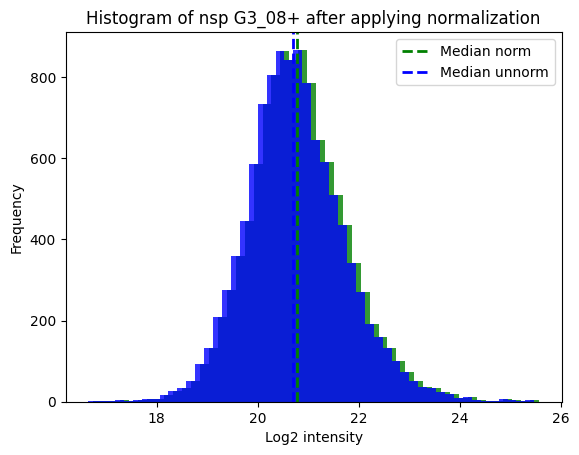

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


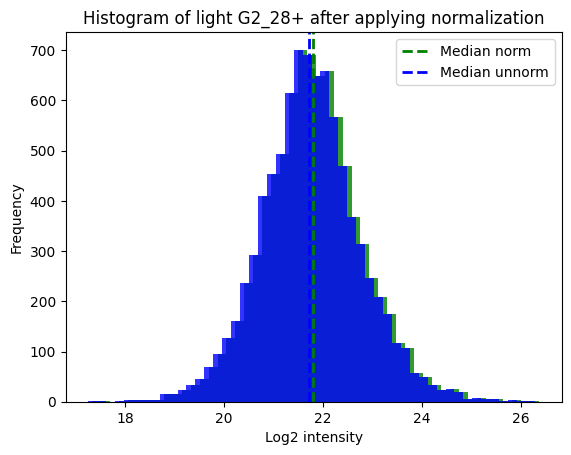

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


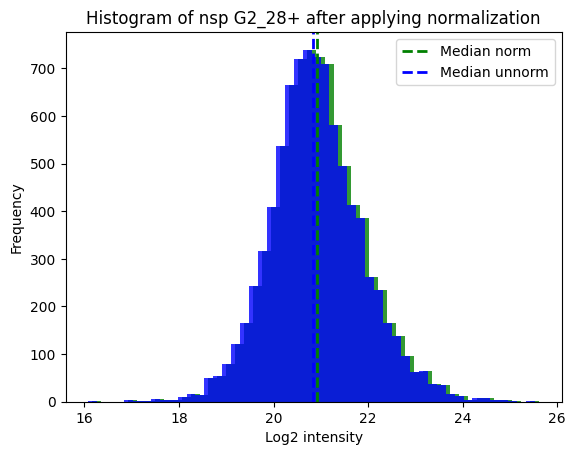

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


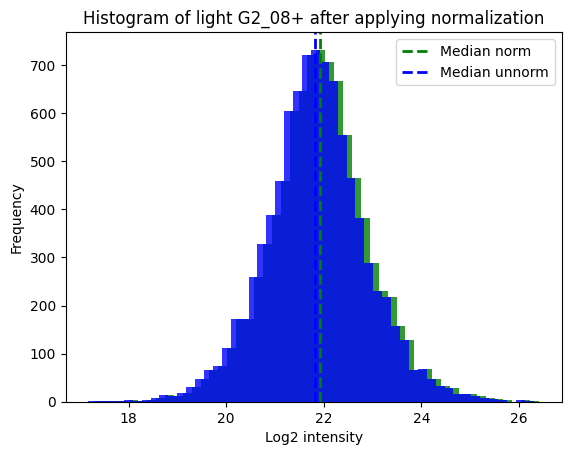

ic| metadata.columns.values.tolist(): ['Run', 'Sample', 'Treatment']


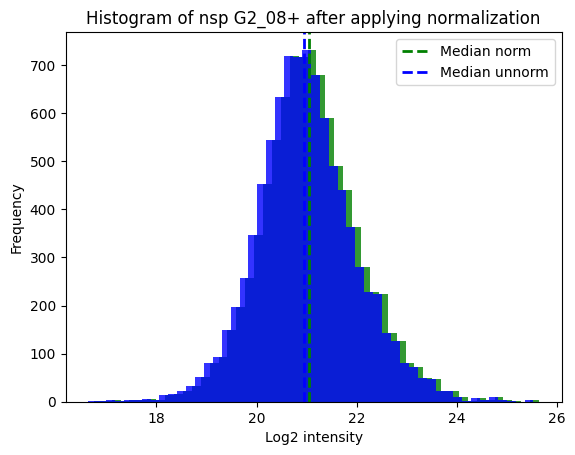

Folder reports already exists at G:/My Drive/Data/data/20240306 eIF 5 lines/3D new pipeline//statistics/normalized


In [43]:

normalize_samples.main(path, normalization_groups, meta)


import data
Subset data
preprocess data
Filter for valid vals


ic| control_samples: ['3D_08_1 -',
                      '3D_28_1 -',
                      '3D_28_2 -',
                      '3D_28_3 -',
                      'G3_08_1 -',
                      'G3_08_2 -',
                      'G3_08_3 -',
                      'G3_28_1 -',
                      '3D_08_2 -',
                      'G3_28_2 -',
                      'G3_28_3 -',
                      'G2_08_1 -',
                      'G2_08_2 -',
                      'G2_08_3 -',
                      '3D_08_3 -',
                      'G2_28_1 -',
                      'G2_28_2 -',
                      'G2_28_3 -']
ic| subset: 'all samples'
ic| data:       3D_08_1 -  3D_28_1 -  3D_28_2 -  3D_28_3 -  G3_08_1 -  G3_08_2 -  \
          40    21.857103  22.375280  22.083166  21.874513  22.114217  22.315175   
          41    22.694857  22.712546  22.621675  22.158996  21.954321  22.454773   
          50    22.074516  22.647703  22.886009  21.769702  22.034846  22.488638   
        

annotate df with the lowest mean value of observed proteins within each sample group per row


21.893349  22.072307   
          5747  22.396661  22.762697  22.727376  22.571745  22.382014  22.565301   
          5751  21.759122  21.170035  21.792513  21.449606  21.624157  21.693976   
          5778  22.333457  22.094973  21.821109  21.439668  21.600896  21.767404   
          
                G3_08_3 -  G3_08_1 +  G3_08_2 +  G3_08_3 +  ...  G2_28_3 -  G2_28_1 +  \
          40    22.101014  22.294513  22.376395  22.072220  ...  22.123307  22.170845   
          41    22.507649  22.504970  22.589505  22.300621  ...  22.447559  22.416423   
          50    22.554540  22.433998  22.525798  22.224040  ...  22.247921  22.657968   
          63    22.391968  22.621014  22.709531  22.182409  ...  22.469825  22.534872   
          64    22.474567  22.608966  22.140622  22.156577  ...  22.455114  22.657287   
          ...         ...        ...        ...        ...  ...        ...        ...   
          5730  21.296002  21.488665  21.902126  21.306411  ...  22.561882  22.813058   
 

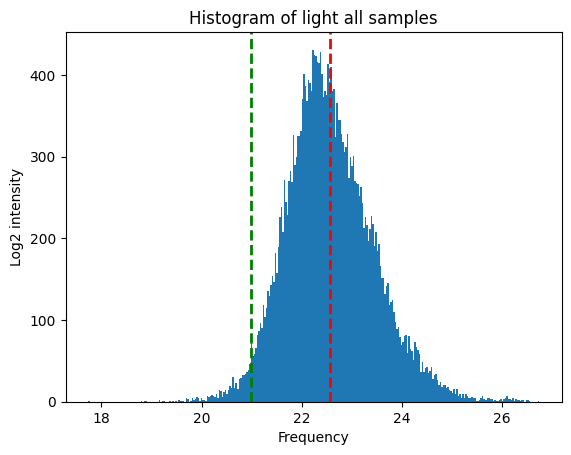

ic| subset: 'control samples'
ic| data:       3D_08_1 -  3D_28_1 -  3D_28_2 -  3D_28_3 -  G3_08_1 -  G3_08_2 -  \
          0     20.884490  21.115469  20.510365  20.445153  20.402727  20.482950   
          2     20.459918  20.357777  20.289033  20.068107  19.500536  20.233002   
          3     20.636063  20.804193  20.429461  20.277023  20.385010  20.536355   
          4     20.417175  20.639422  20.388637  20.001847  19.733229  20.255393   
          7     20.002690  20.417256  20.571932  20.769551  20.319787  20.666876   
          ...         ...        ...        ...        ...        ...        ...   
          5769  20.718434  20.721195  20.615410  20.077483  20.239531  20.245642   
          

annotate df with the lowest mean value of observed proteins within each sample group per row


5770  21.763374  21.412522  21.114681  21.086261  21.125519  21.867789   
          5772  21.152960  21.040843  20.526826  20.629649  20.680327  20.524935   
          5774  20.758876  20.479953  20.484679  19.893584  20.324680  20.170535   
          5778  20.743854  20.686312  20.699893  20.209050  20.372884  20.506049   
          
                G3_08_3 -  G3_28_1 -  3D_08_2 -  G3_28_2 -  G3_28_3 -  G2_08_1 -  \
          0     20.486330  20.022125  20.436153  20.312449  20.123300  20.533451   
          2     19.750595  20.160629  20.026516  20.323714  19.963732  20.120772   
          3     20.268391  20.553972  20.244768  20.679291  20.291894  20.605520   
          4     19.996433  20.219657  20.407989  20.527446  20.459110  20.565881   
          7     20.640391  20.476879  20.905911  21.065293  20.339689  20.669492   
          ...         ...        ...        ...        ...        ...        ...   
          5769  20.096396  20.462315  20.526172  20.783693  20.686887  21.1

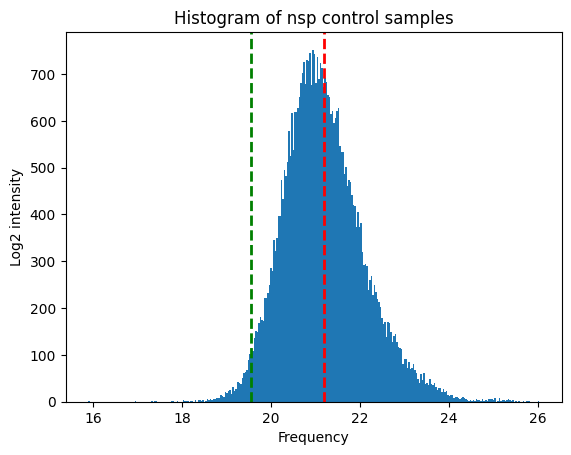

preform imputation
Inspect df after all annotation
Inspect df after all annotation


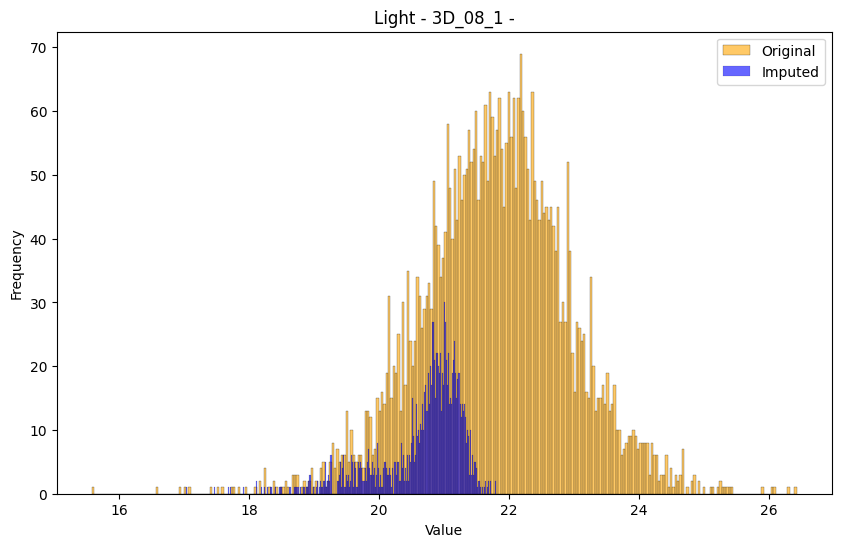

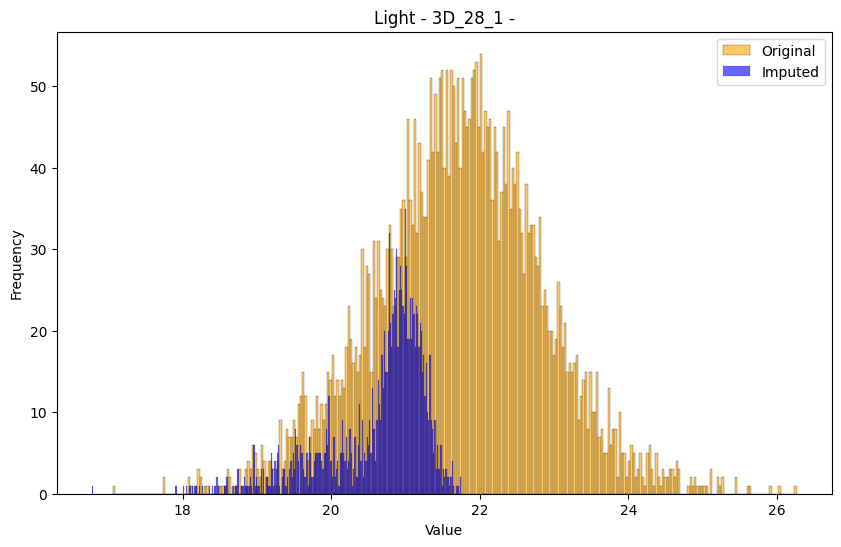

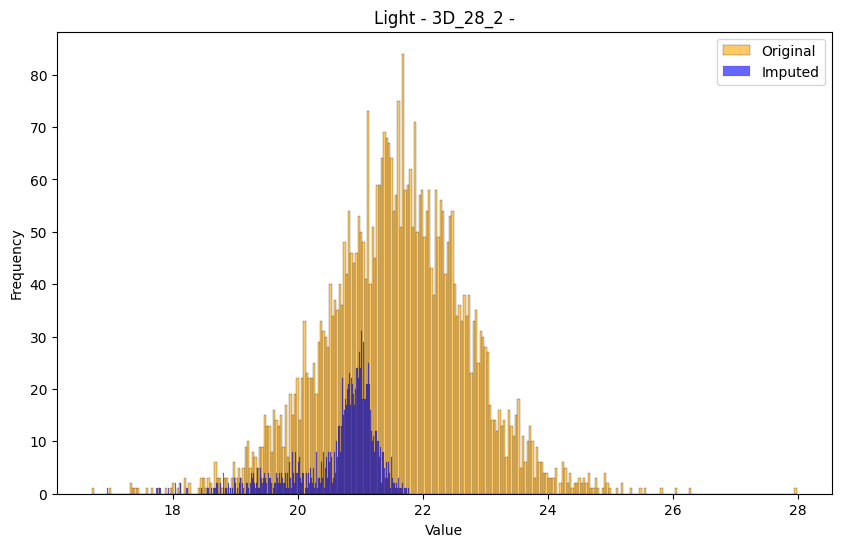

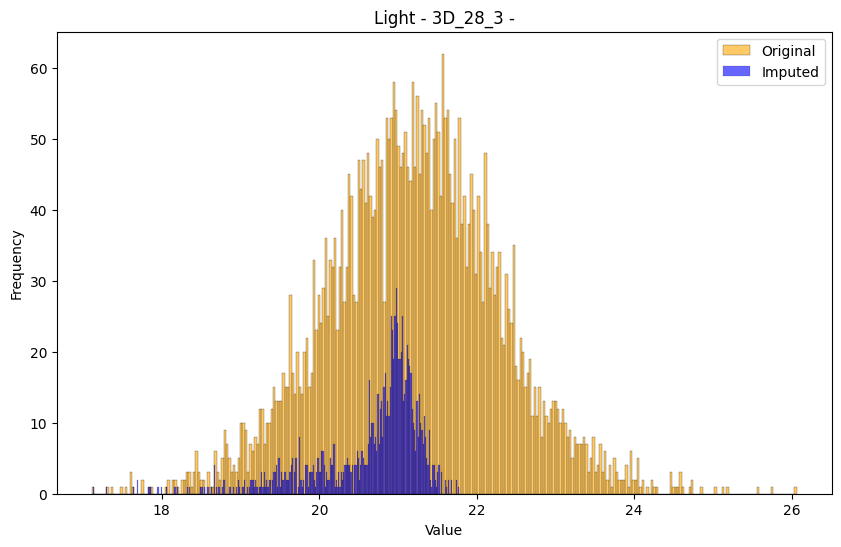

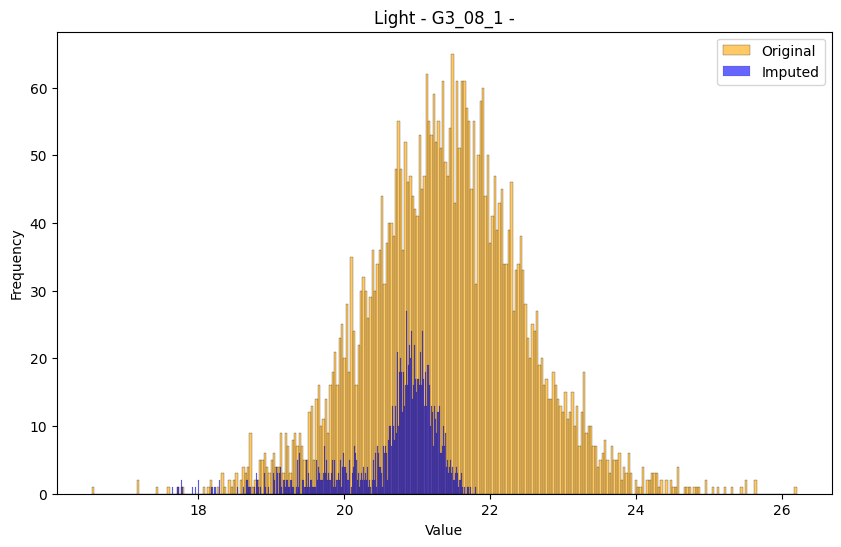

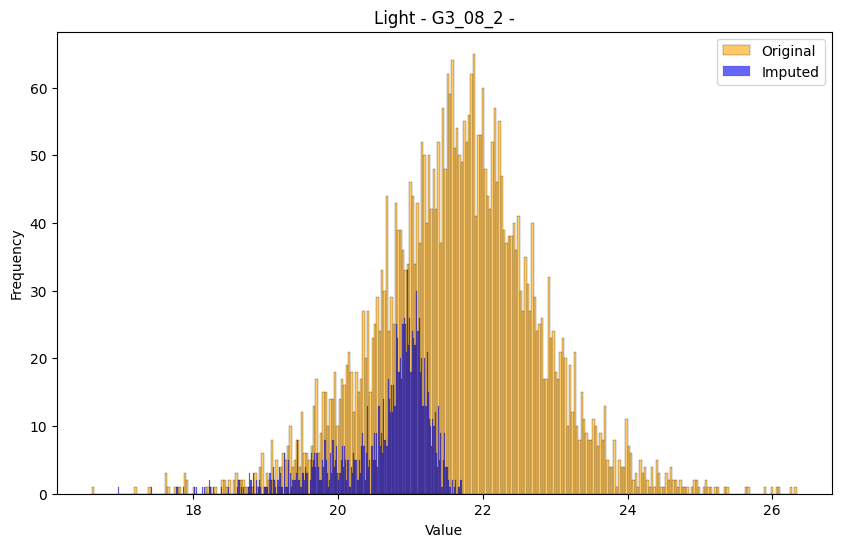

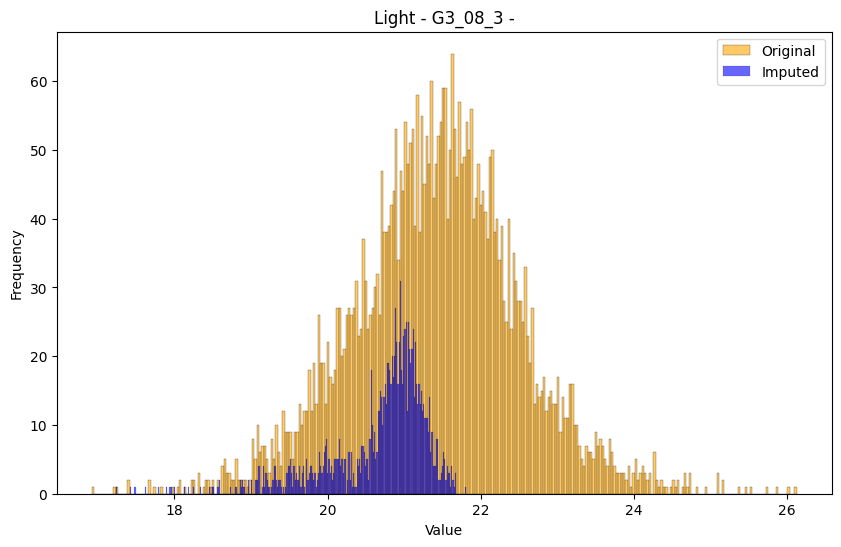

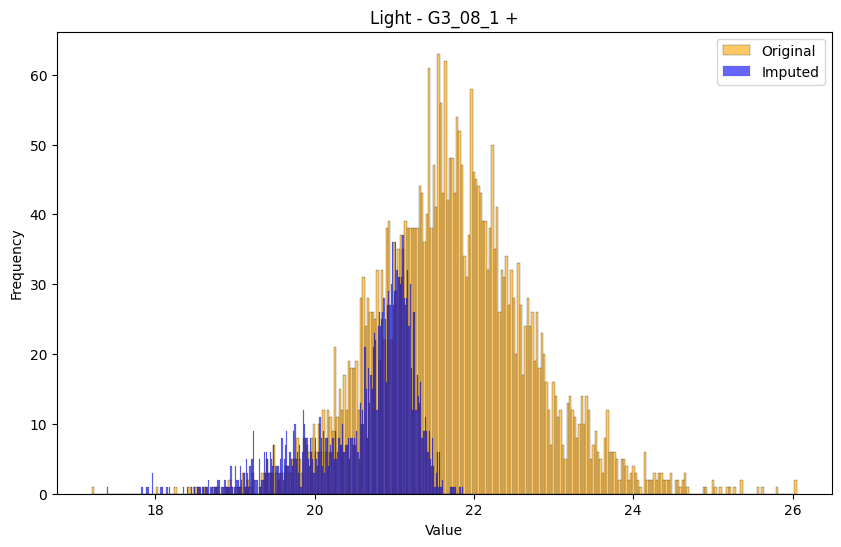

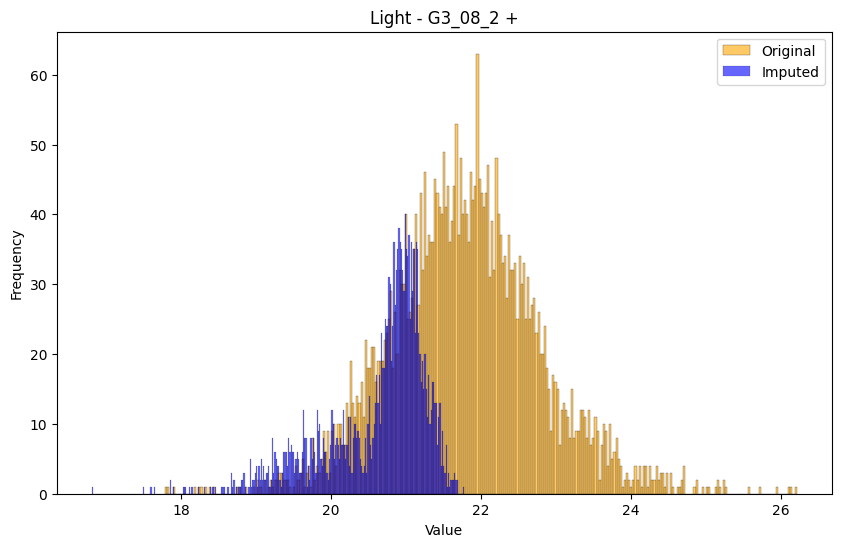

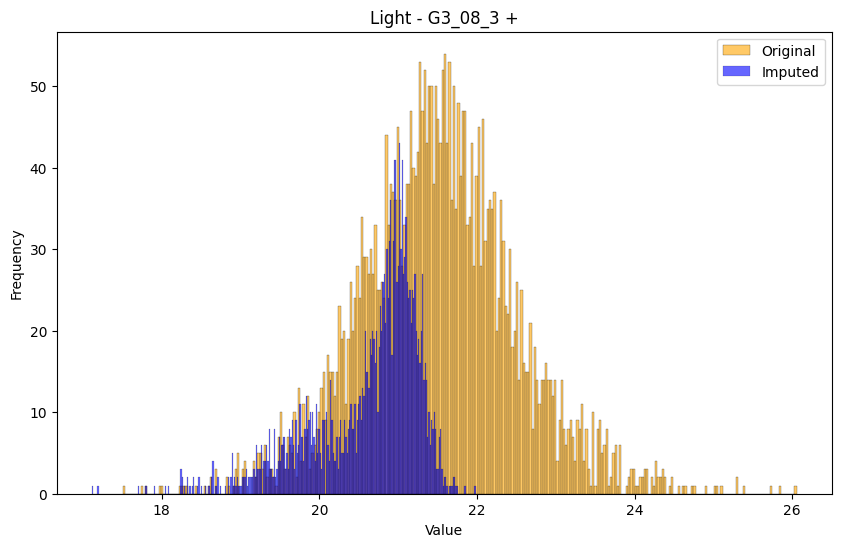

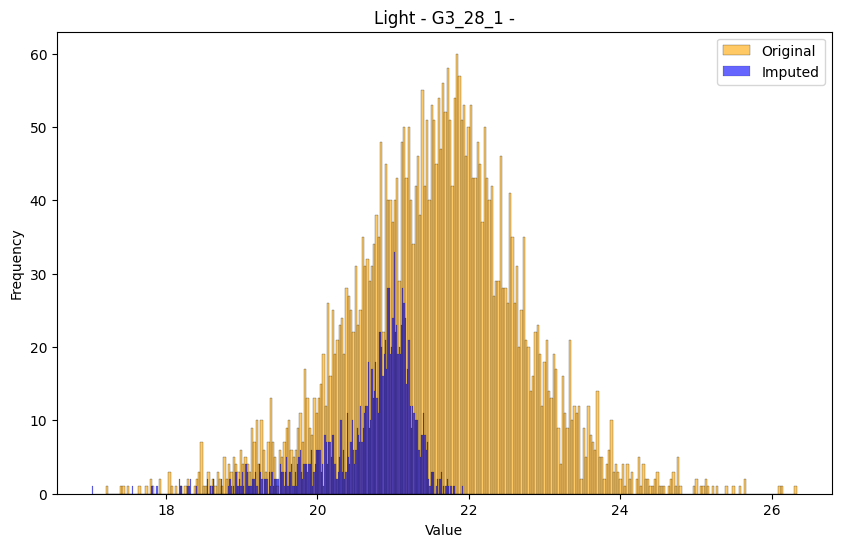

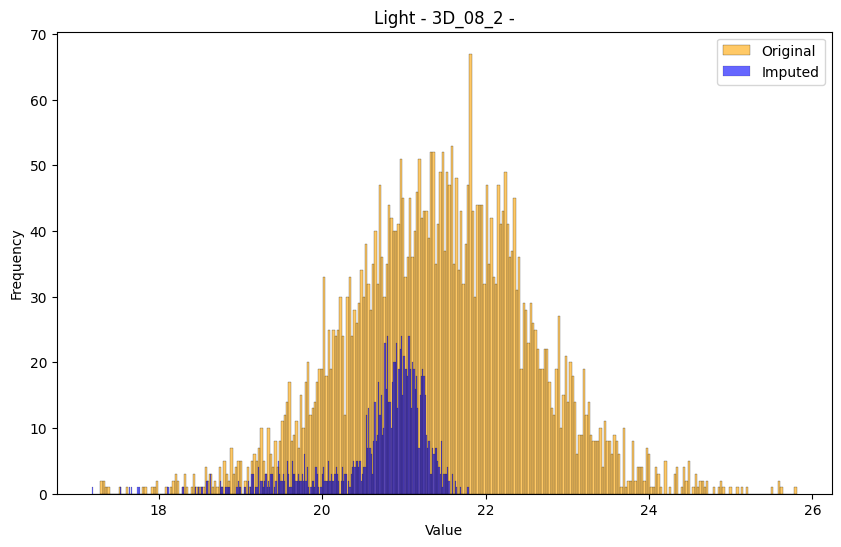

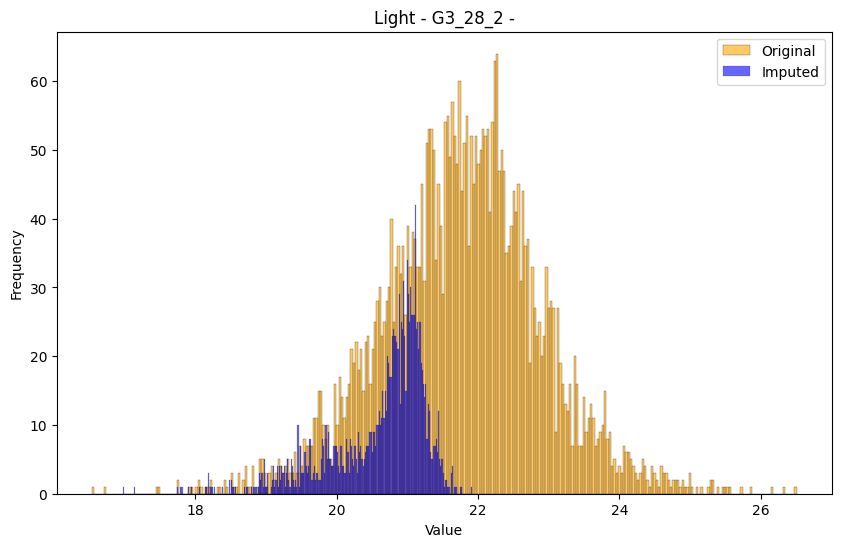

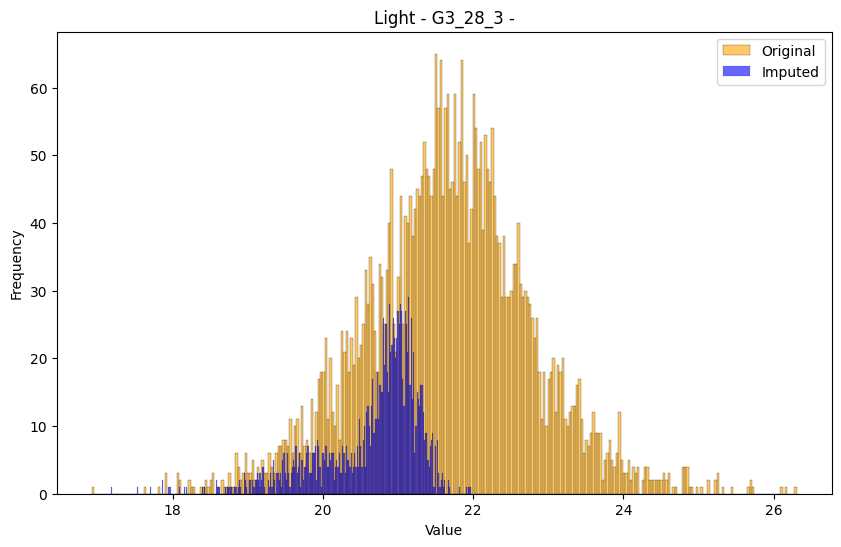

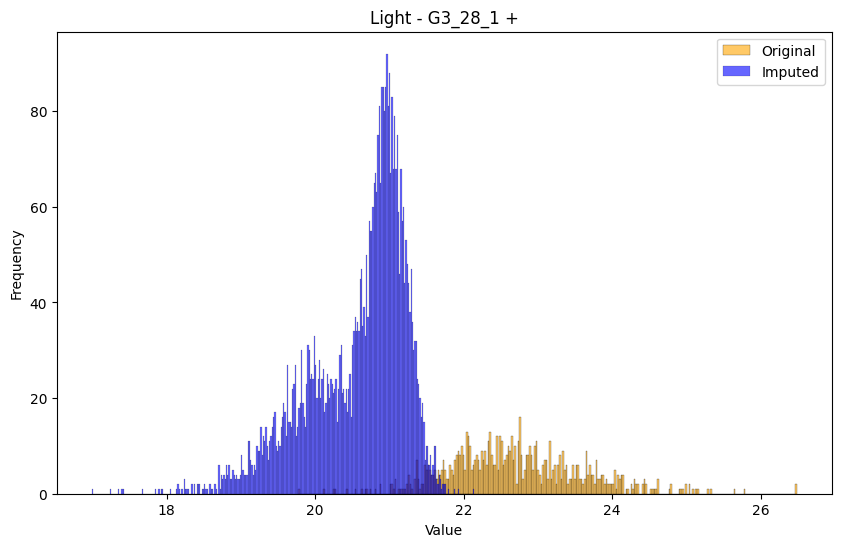

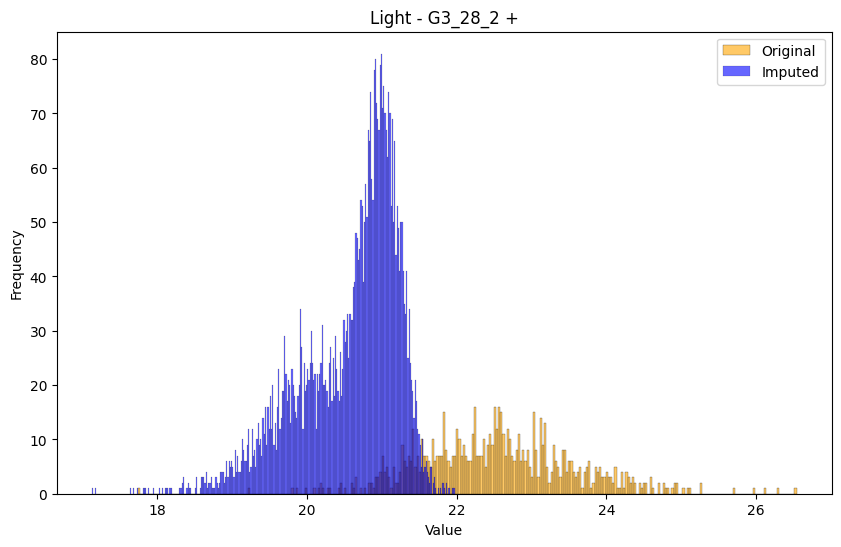

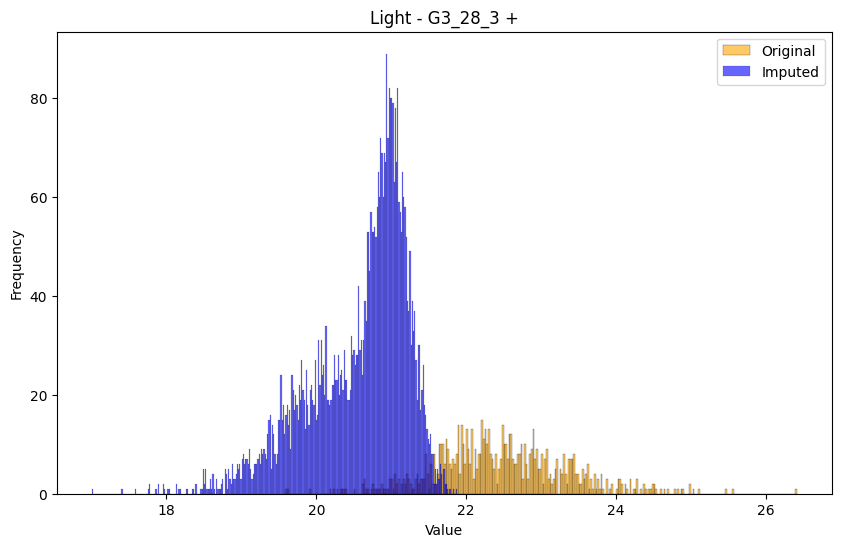

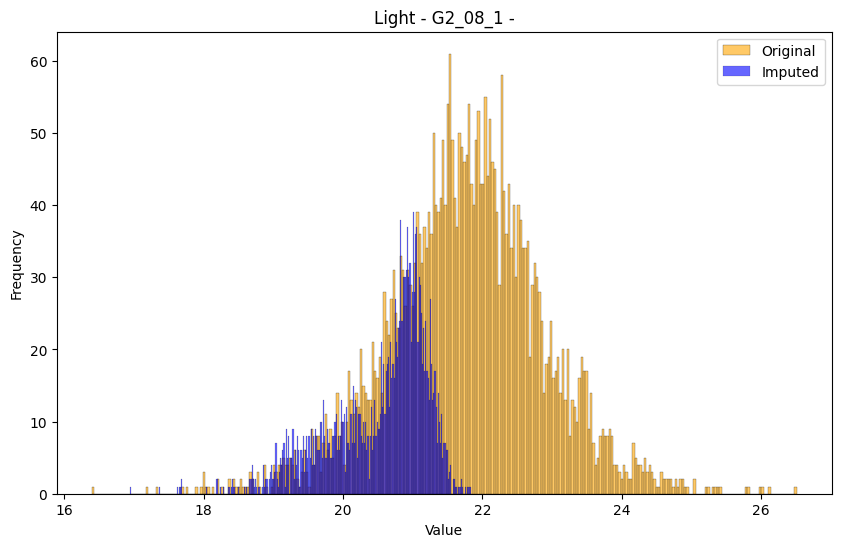

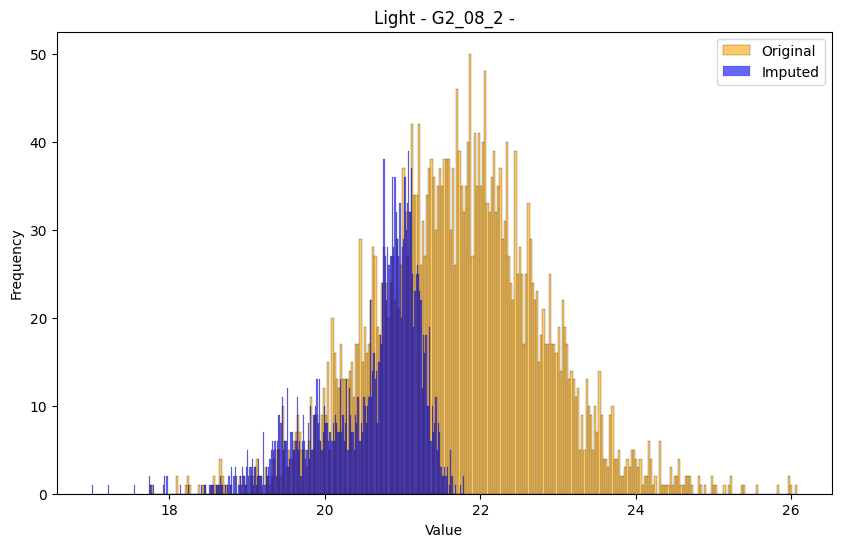

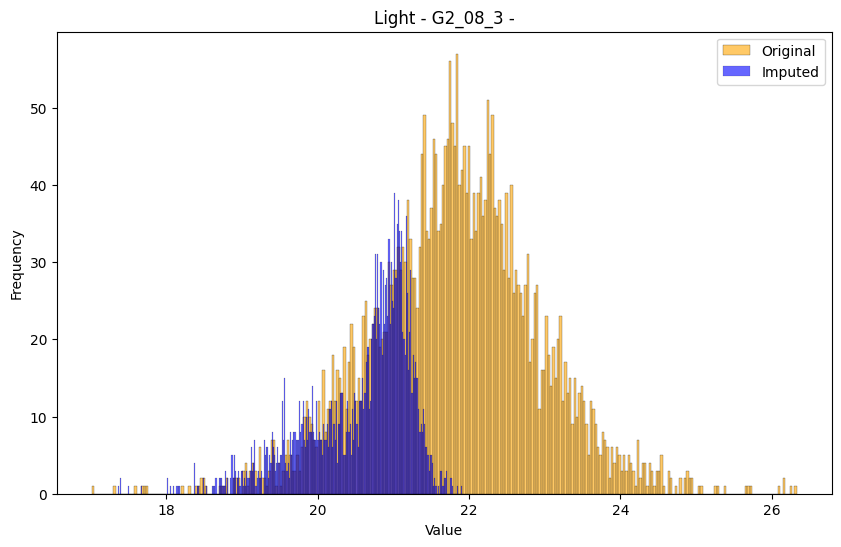

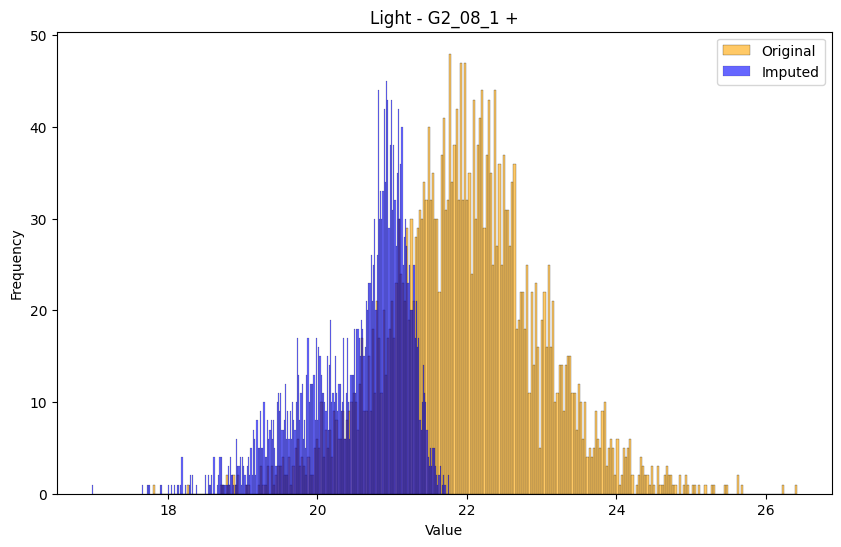

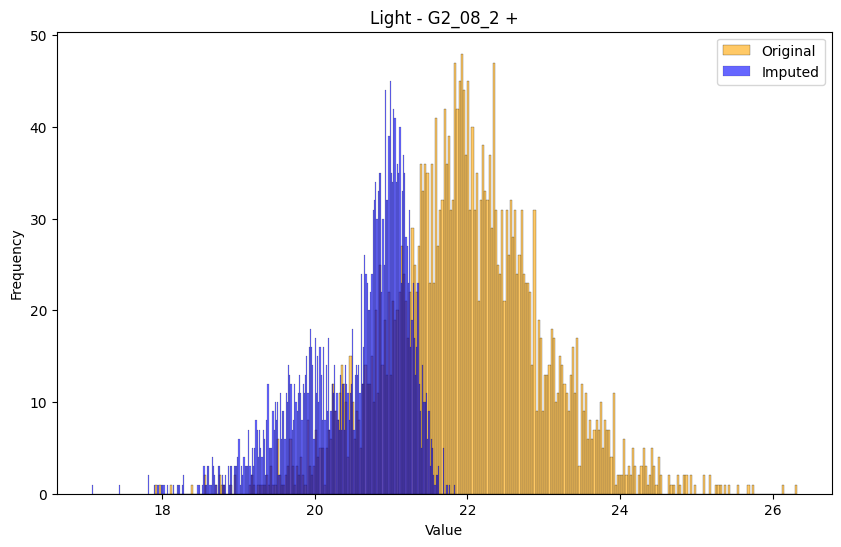

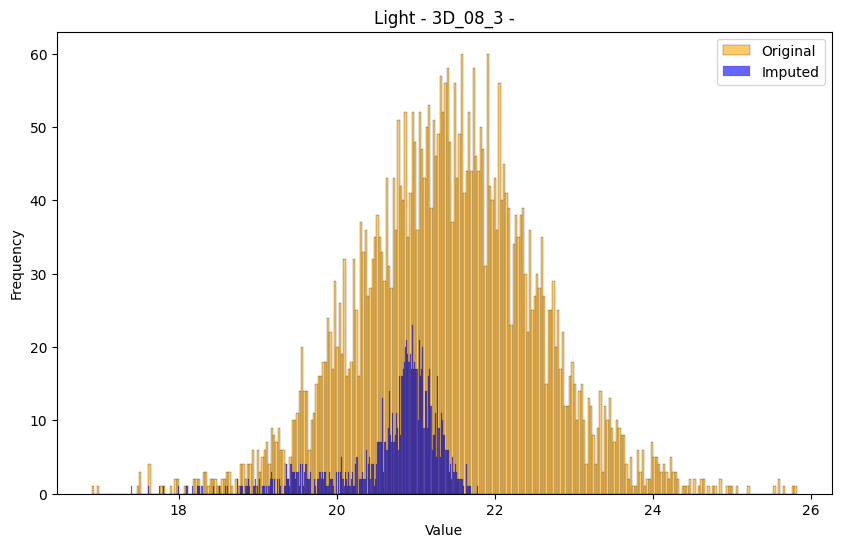

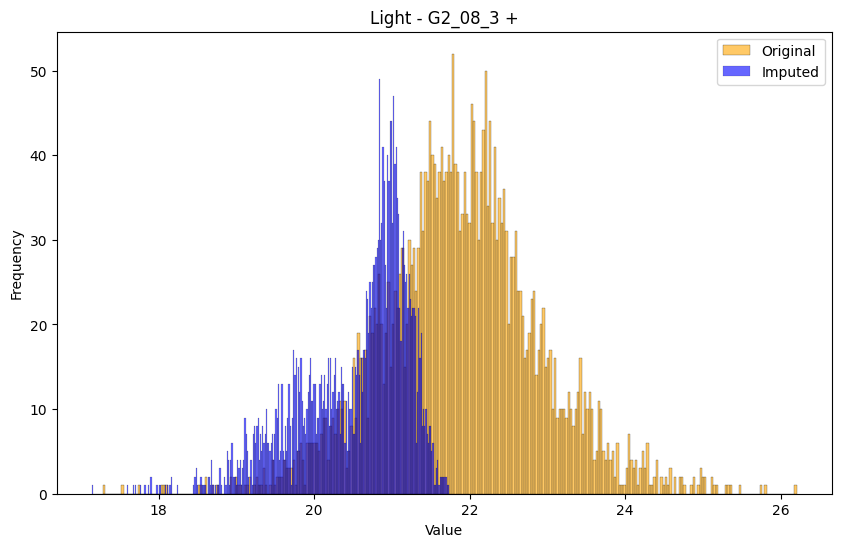

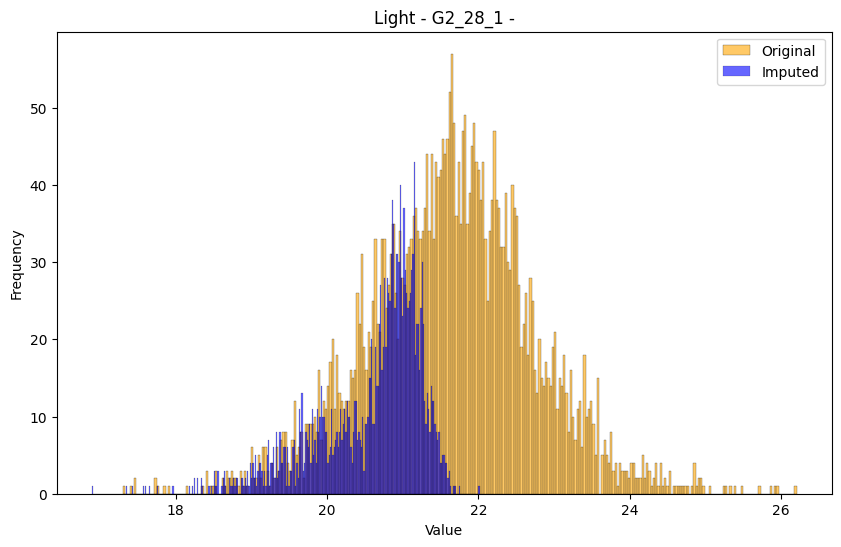

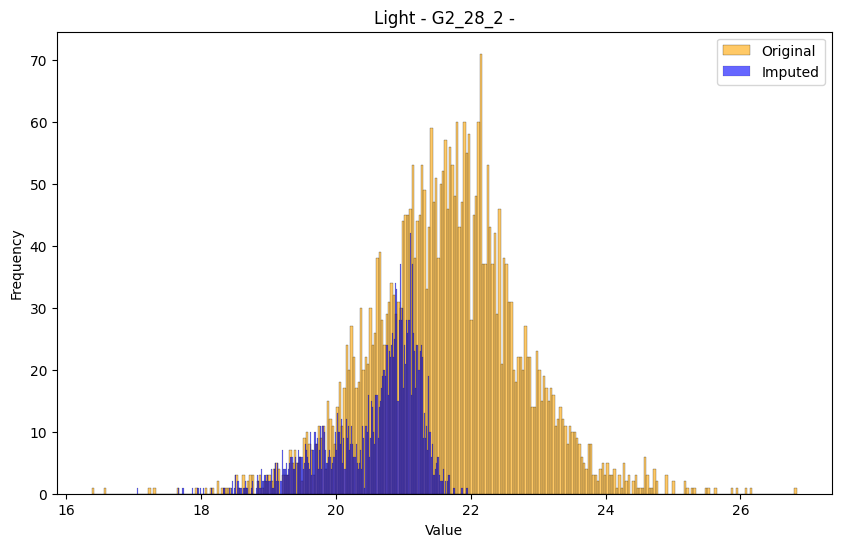

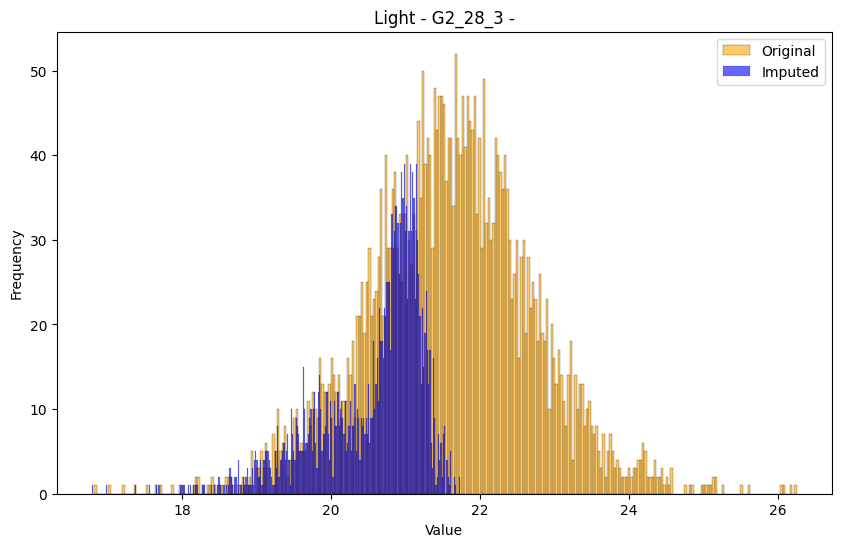

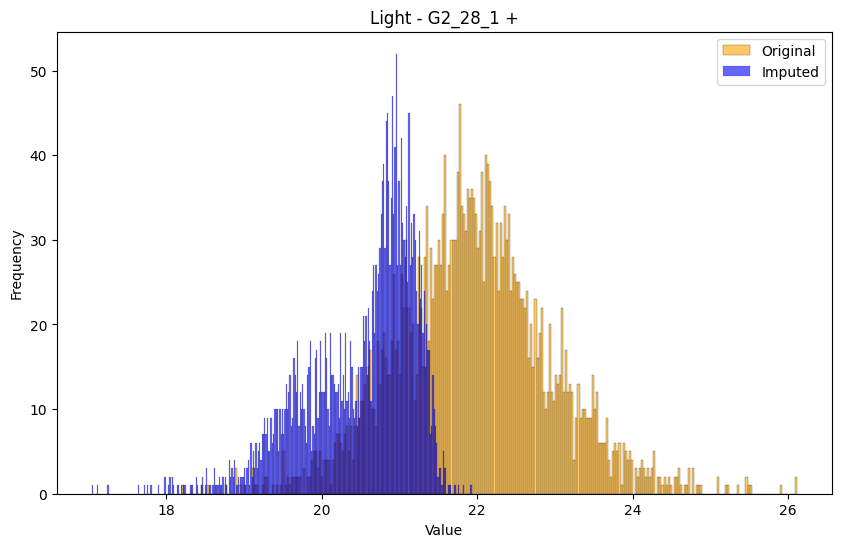

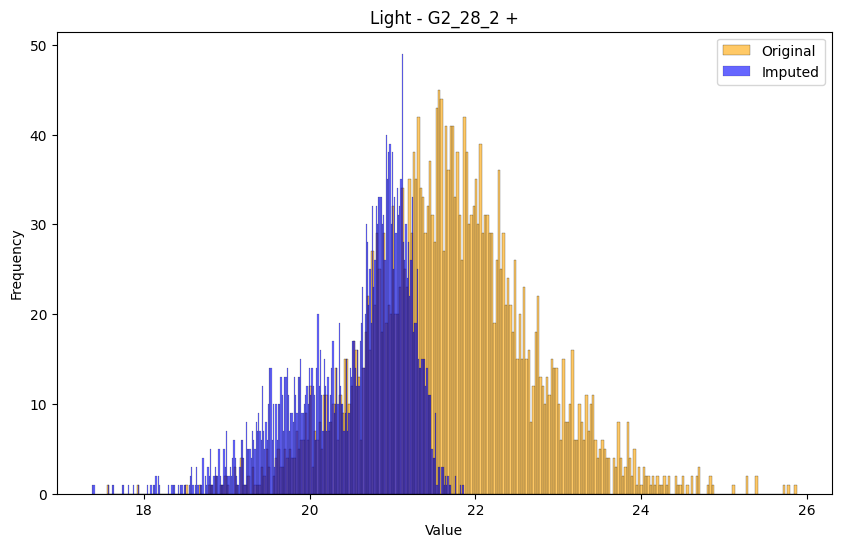

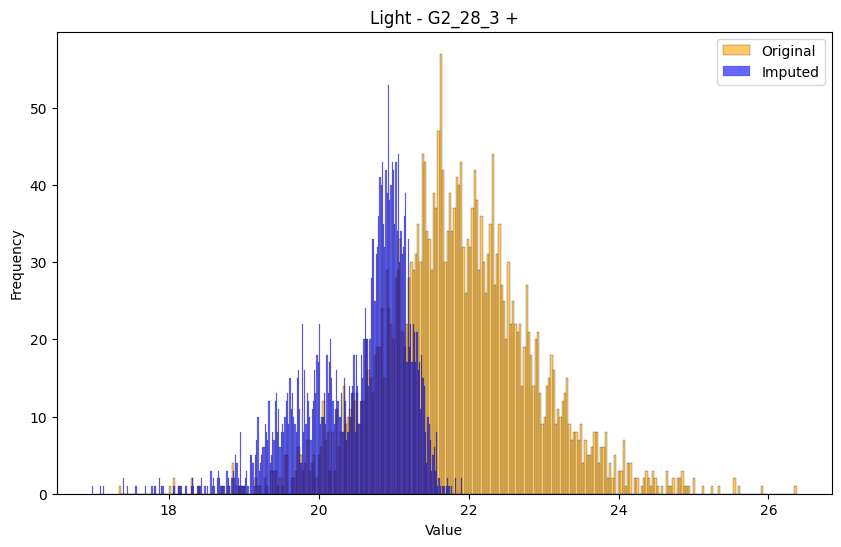

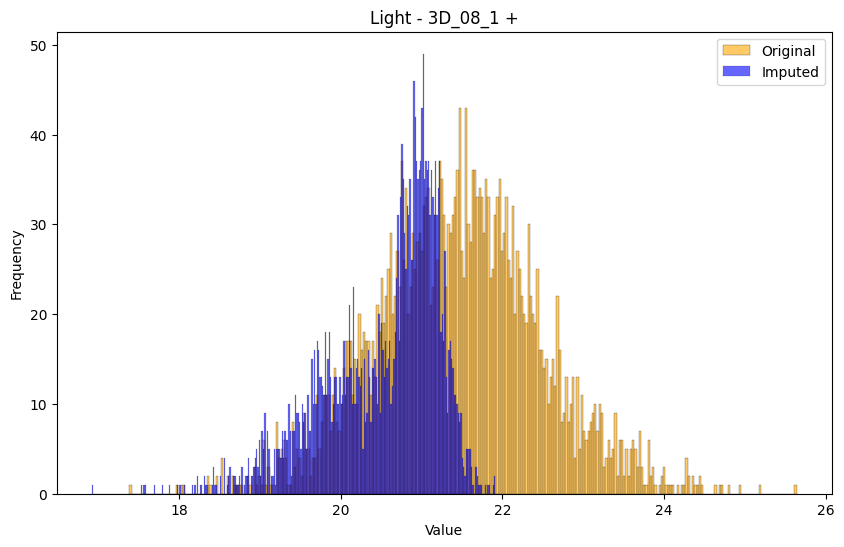

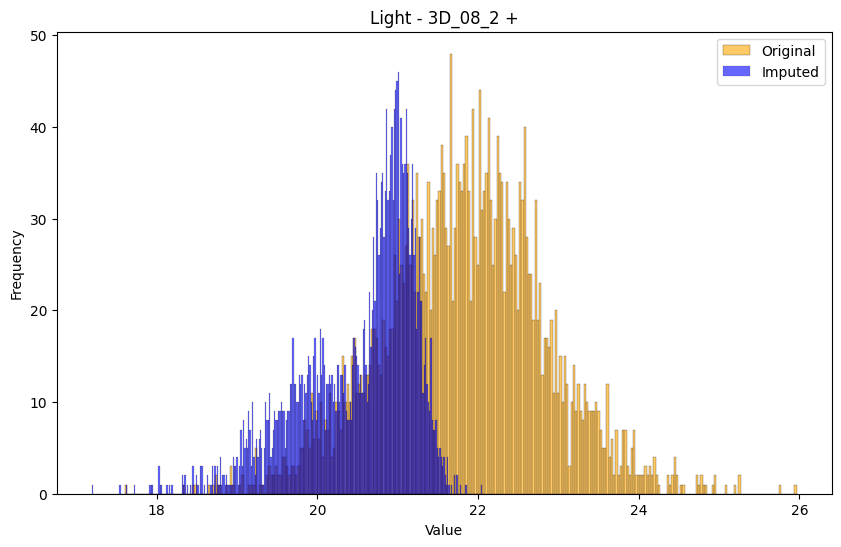

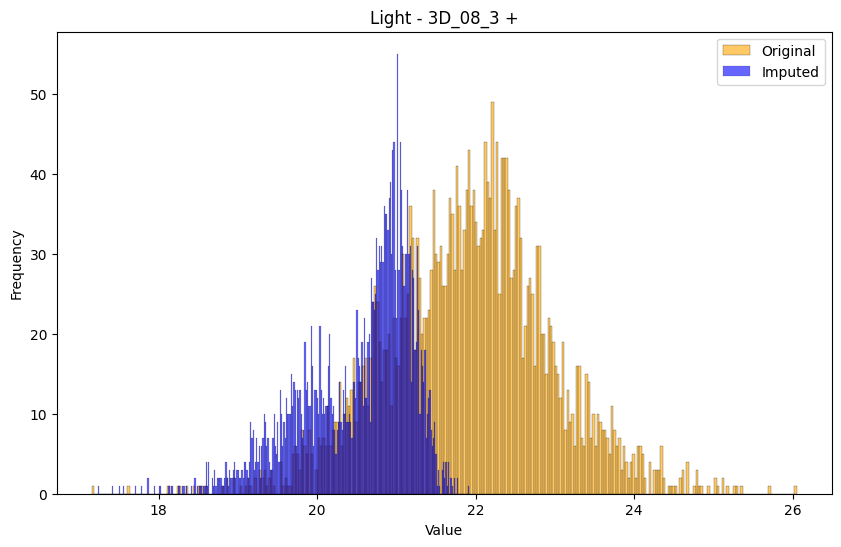

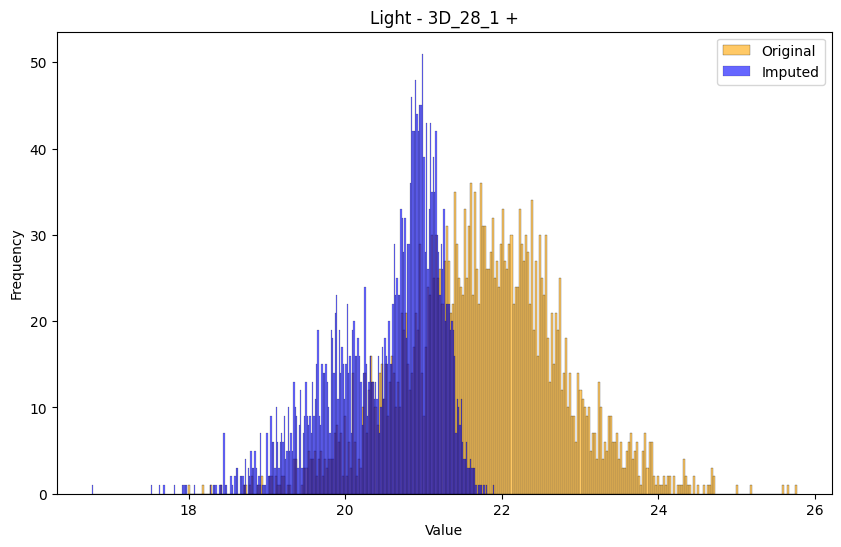

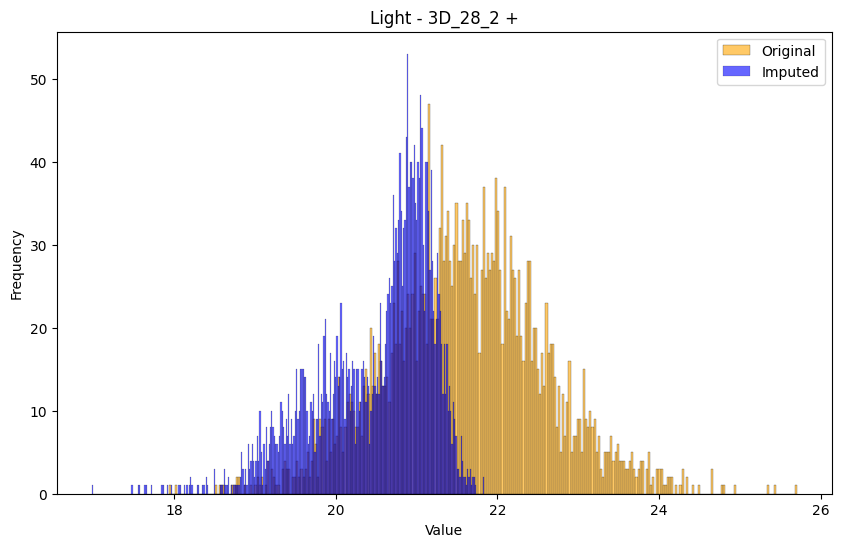

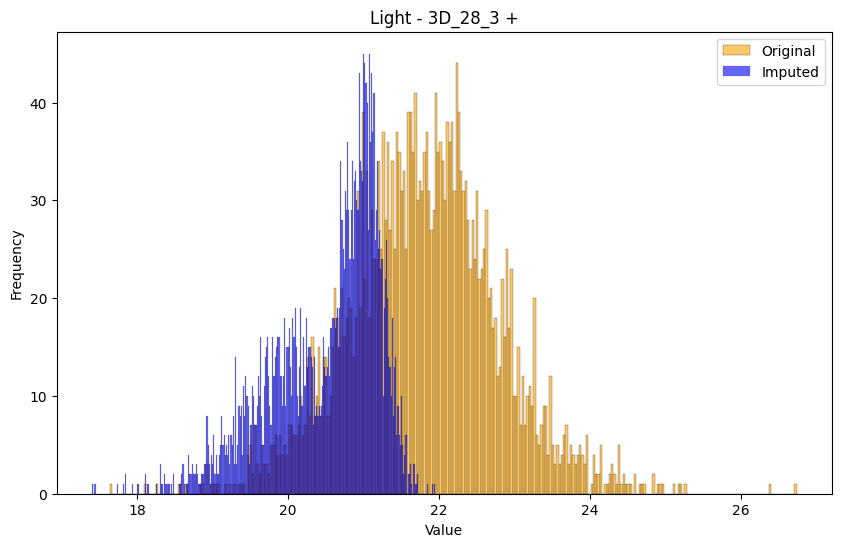

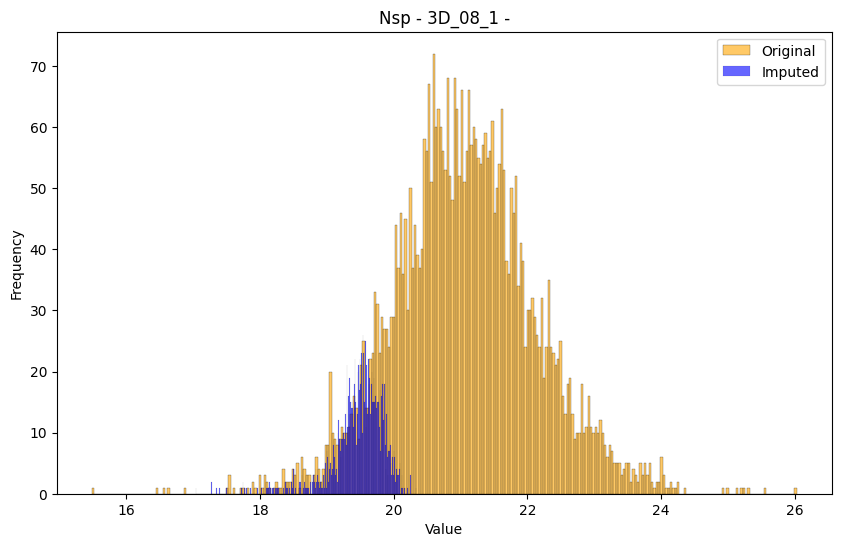

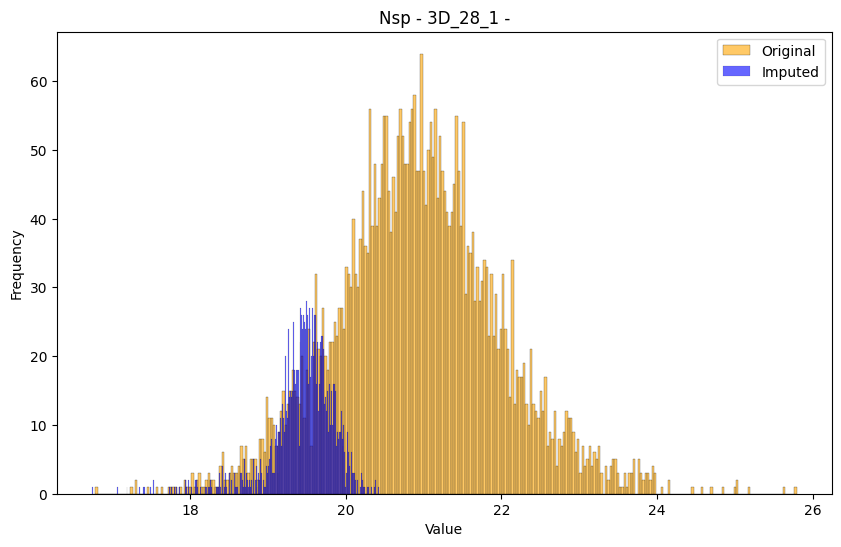

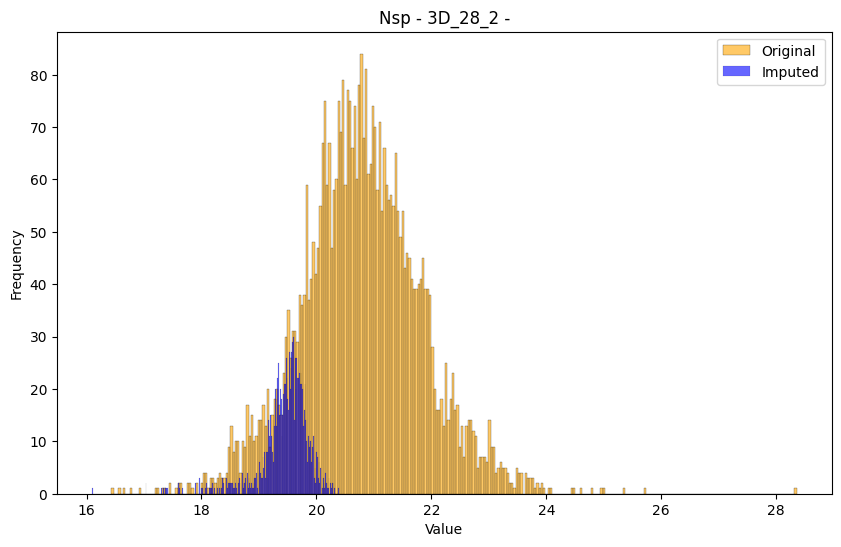

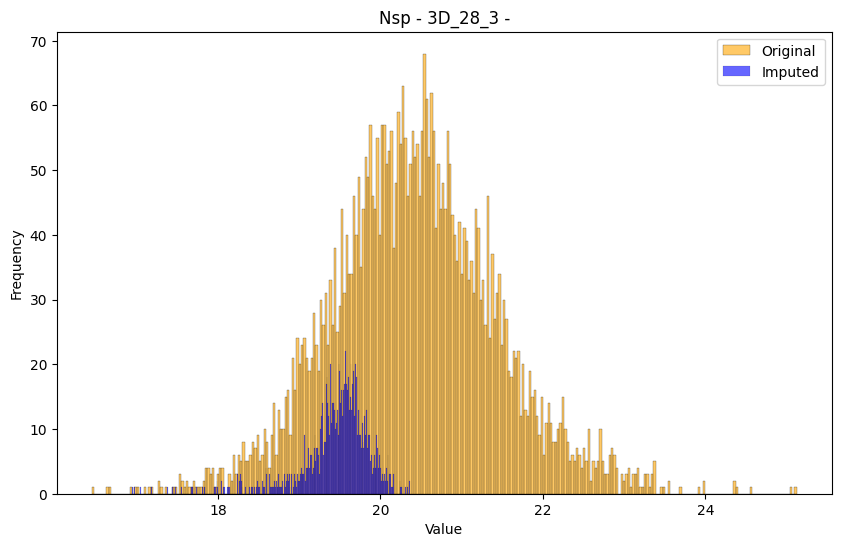

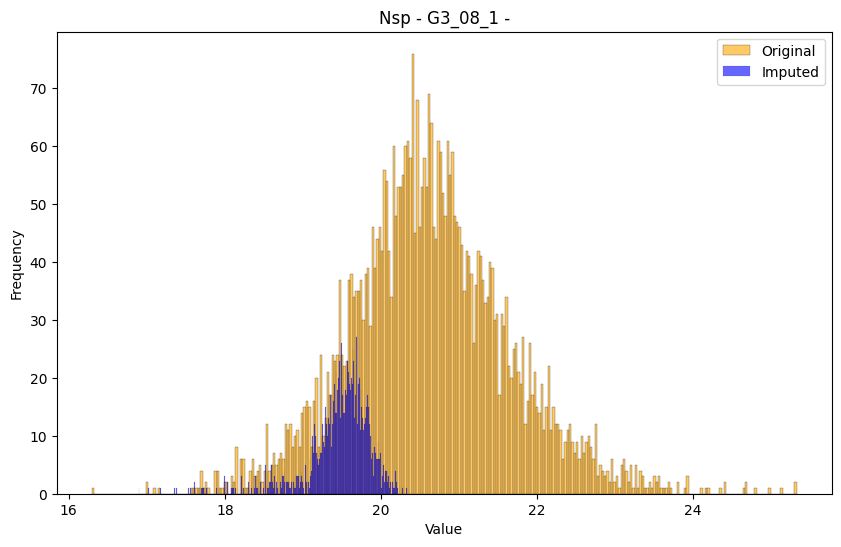

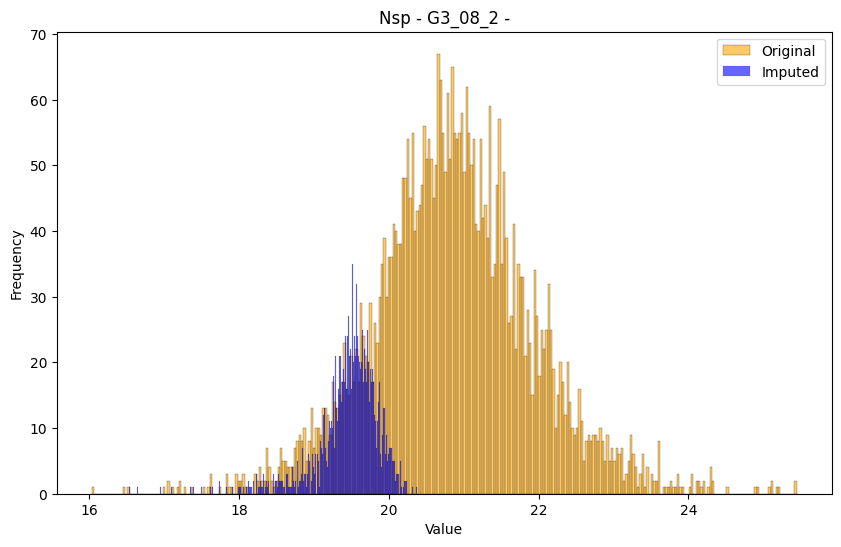

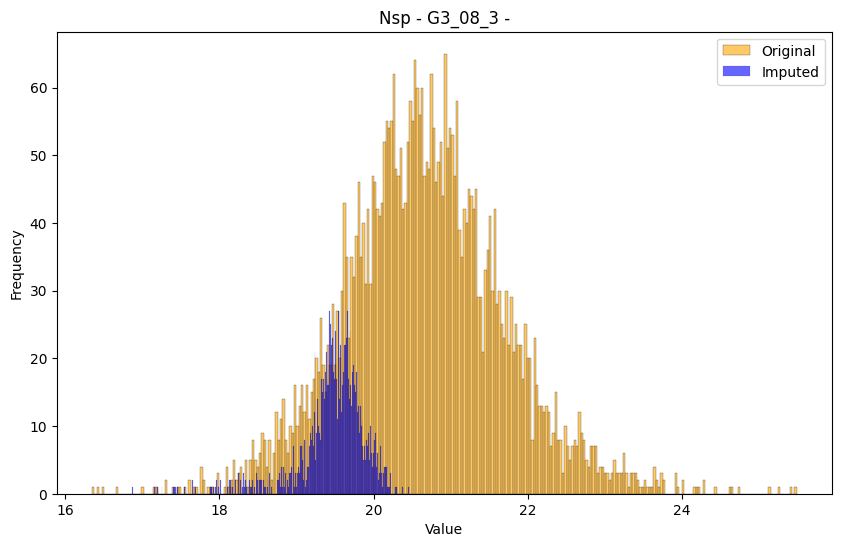

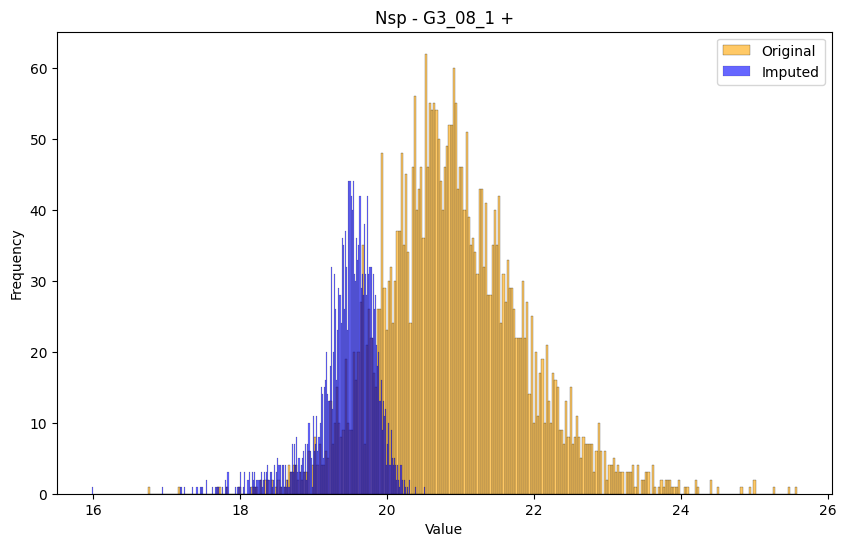

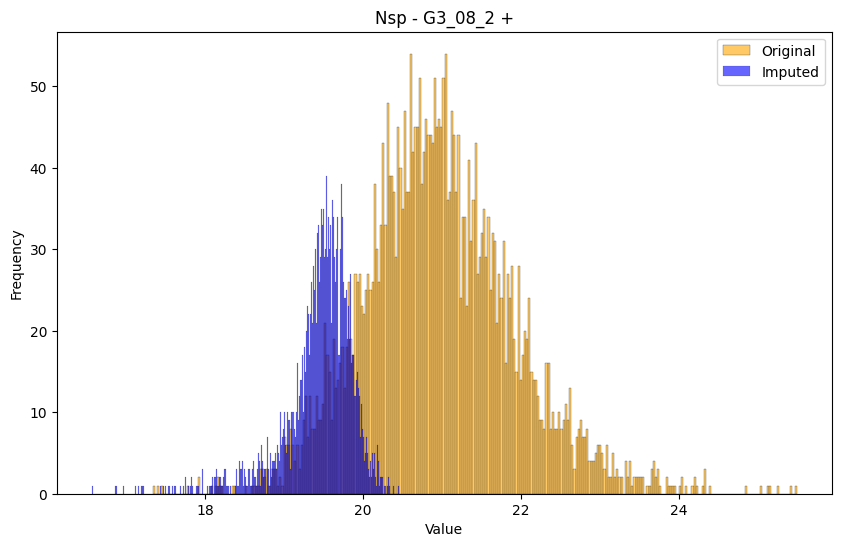

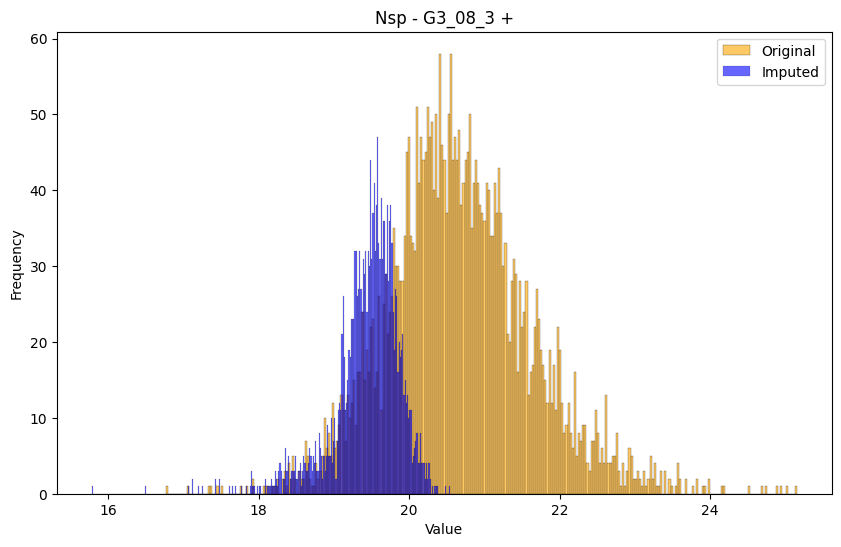

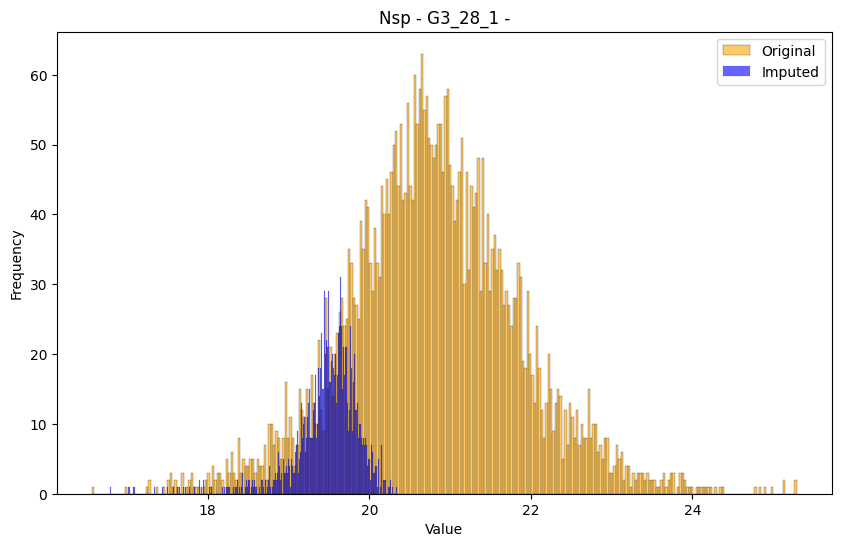

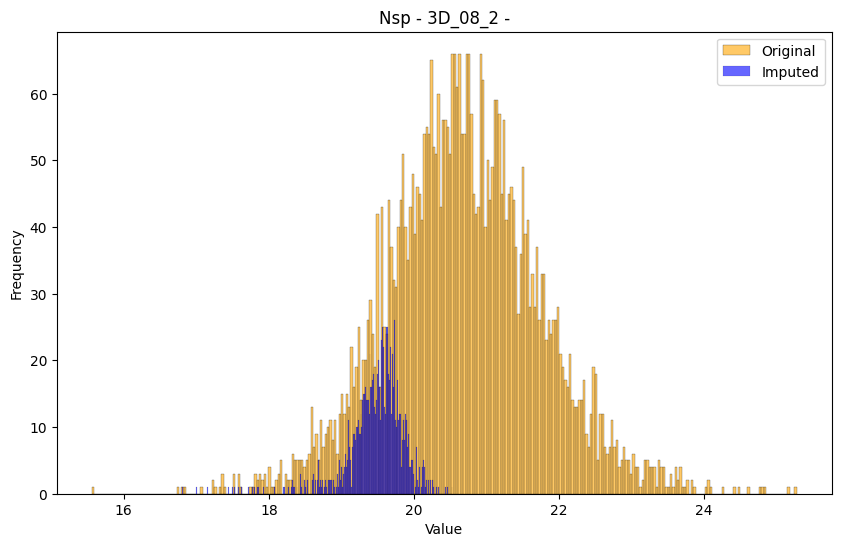

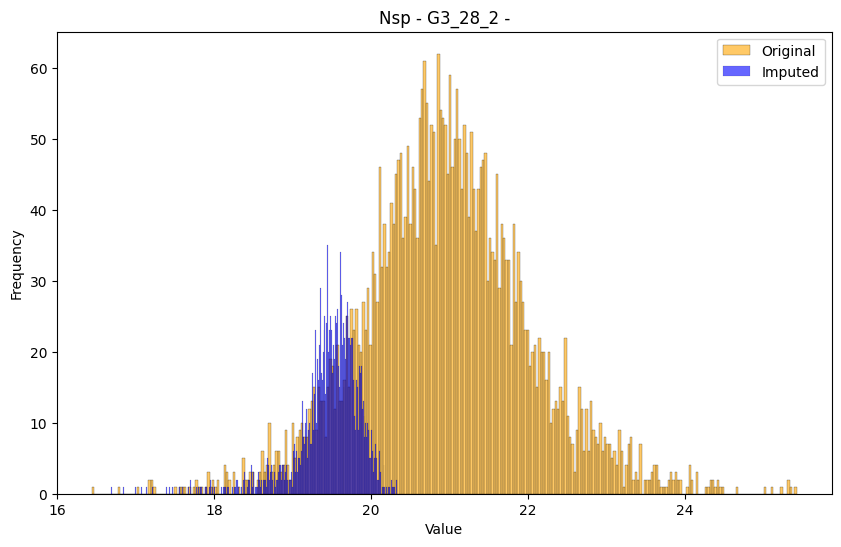

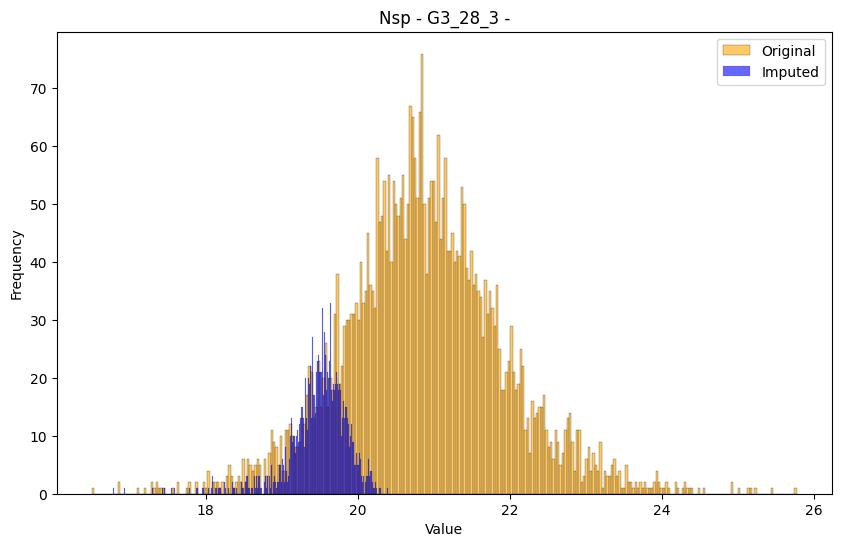

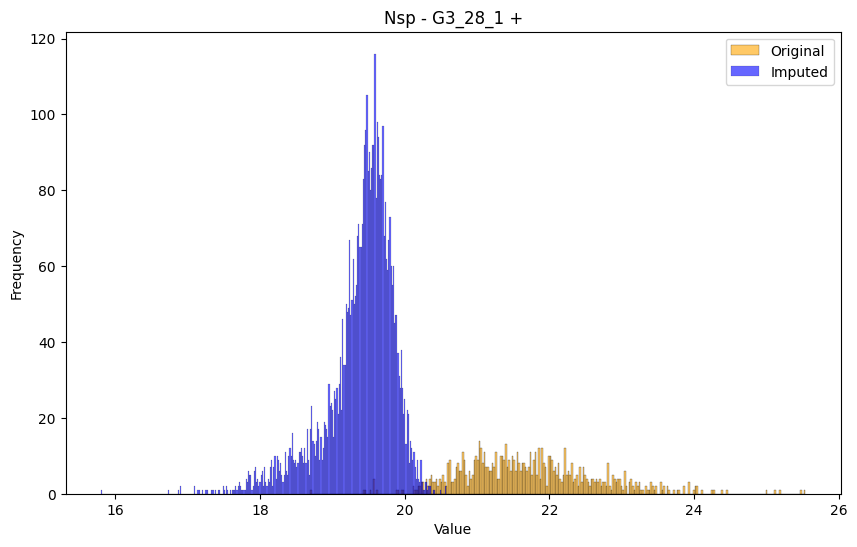

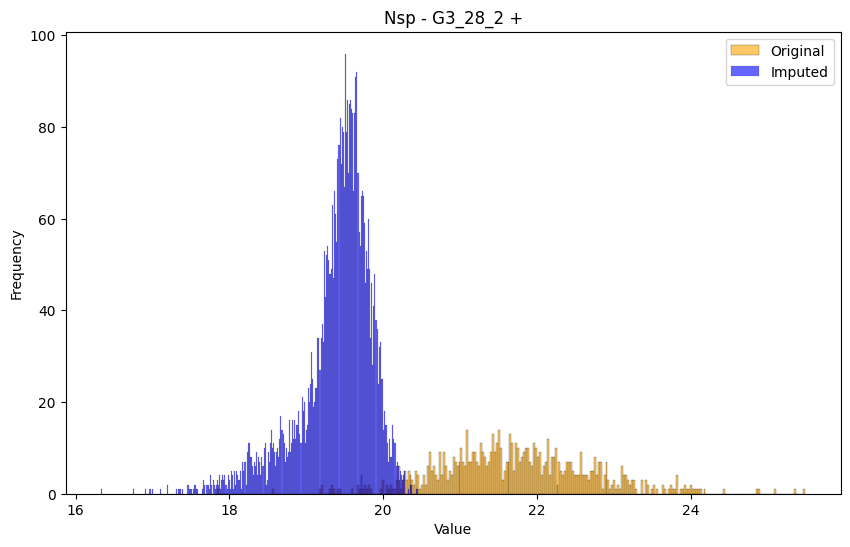

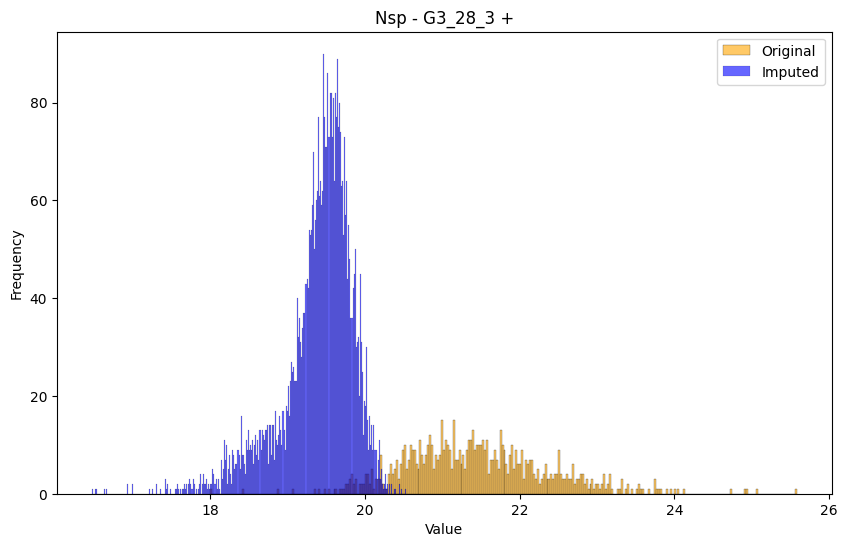

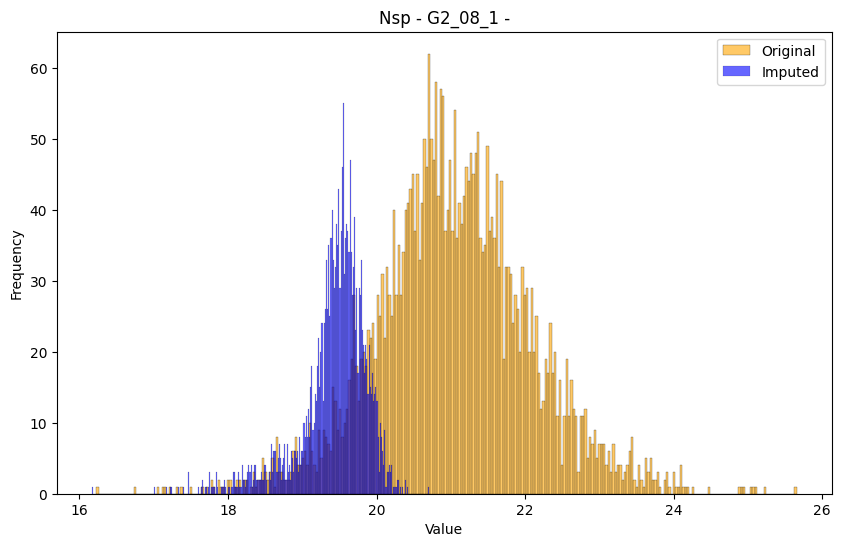

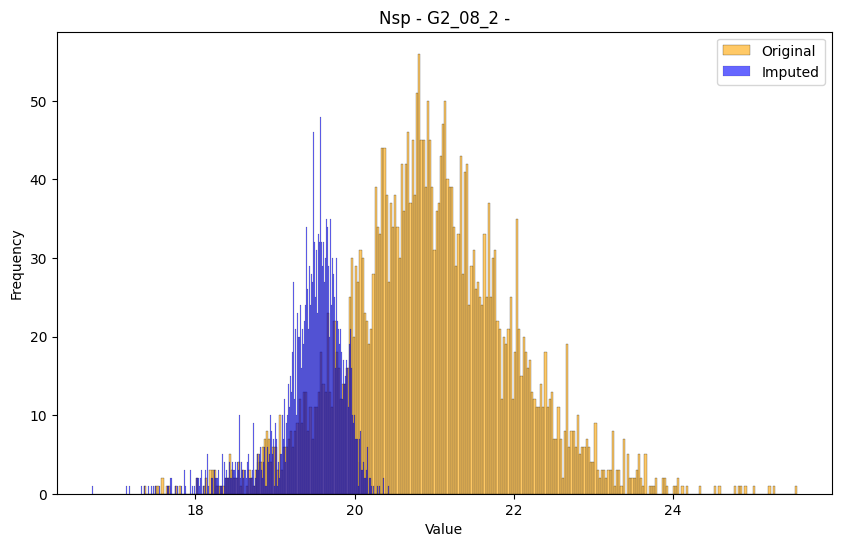

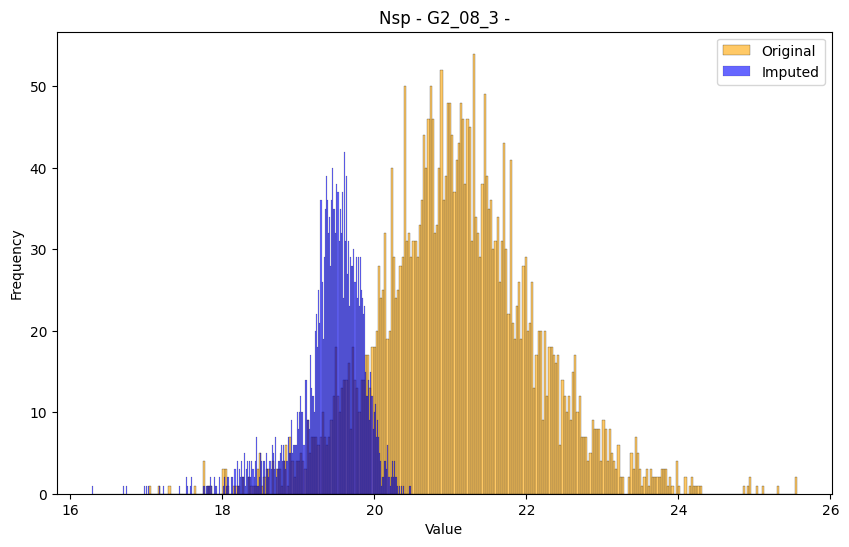

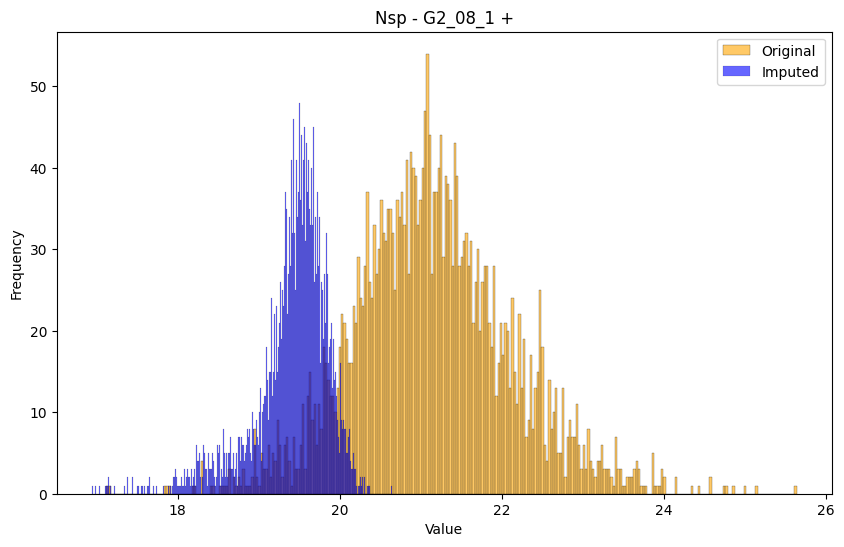

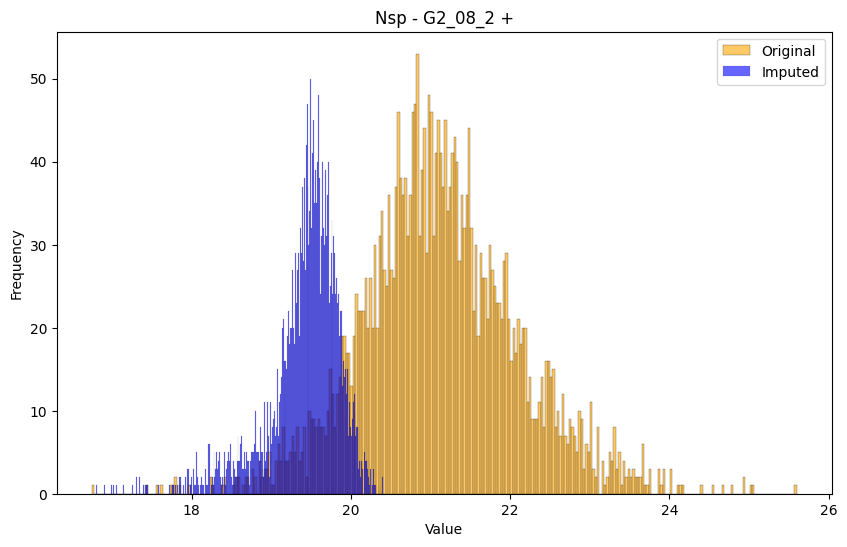

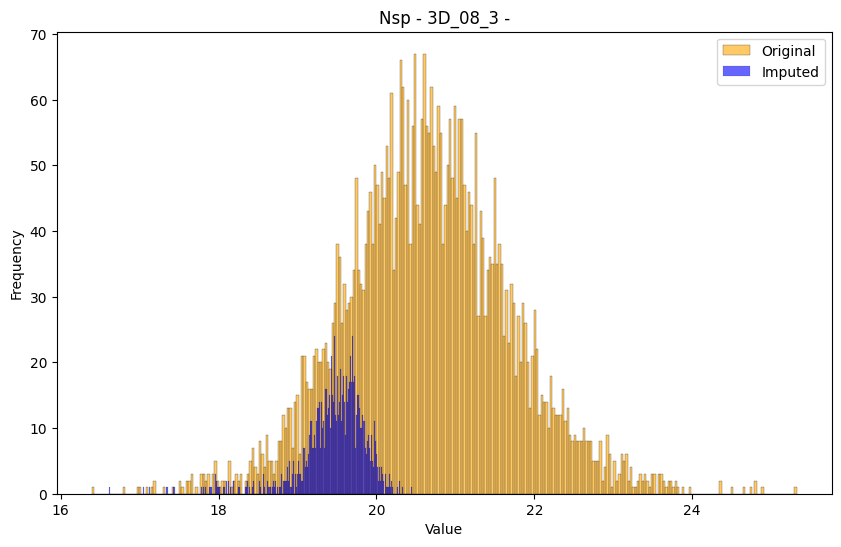

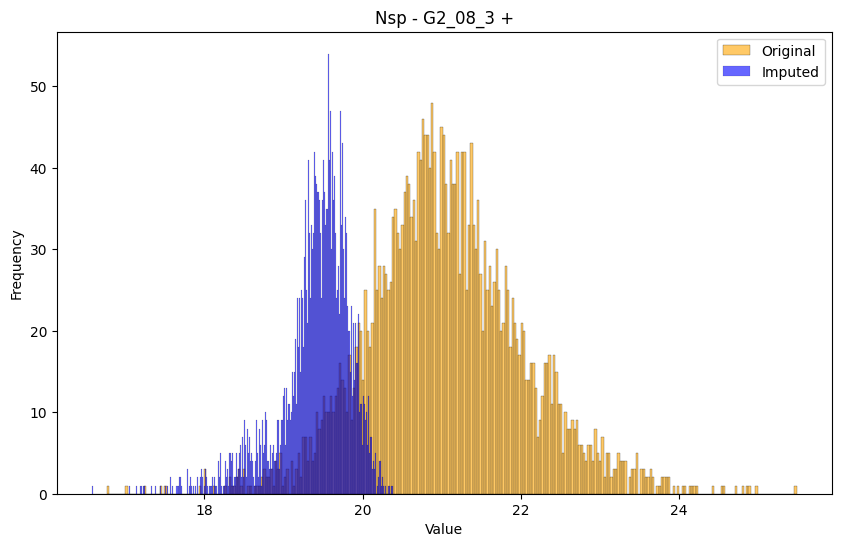

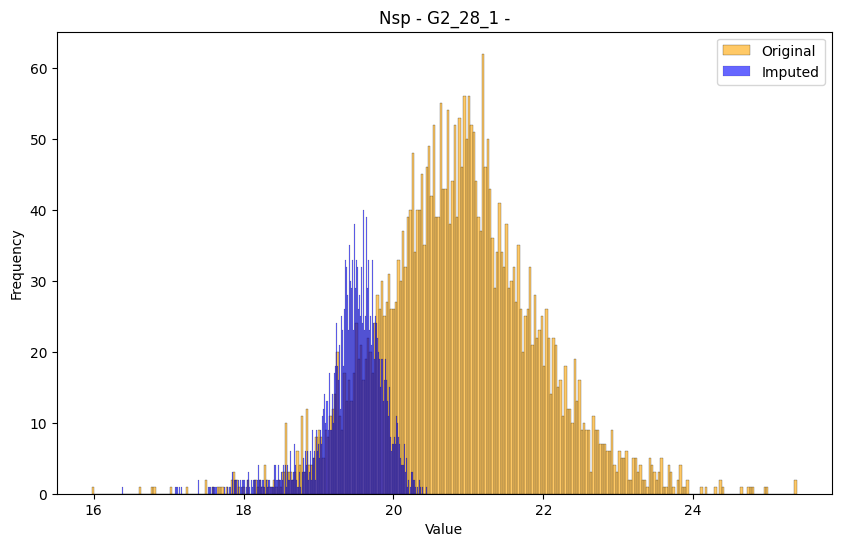

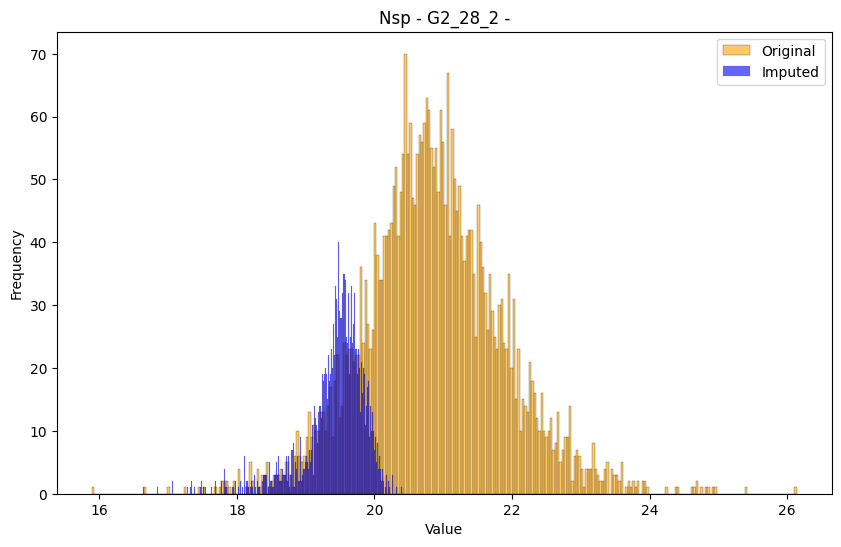

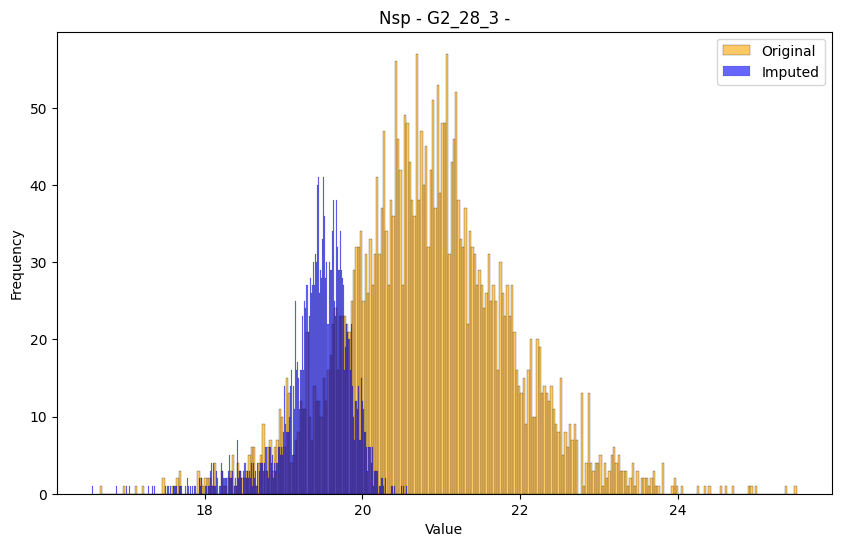

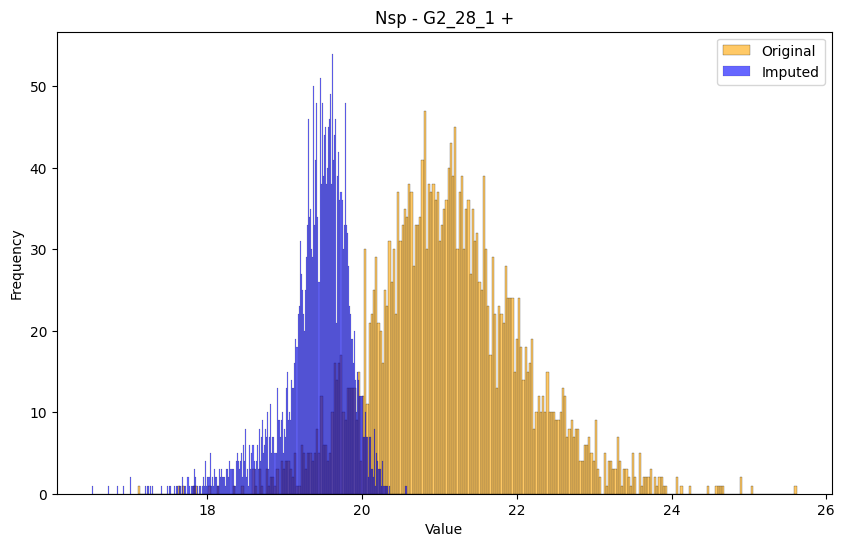

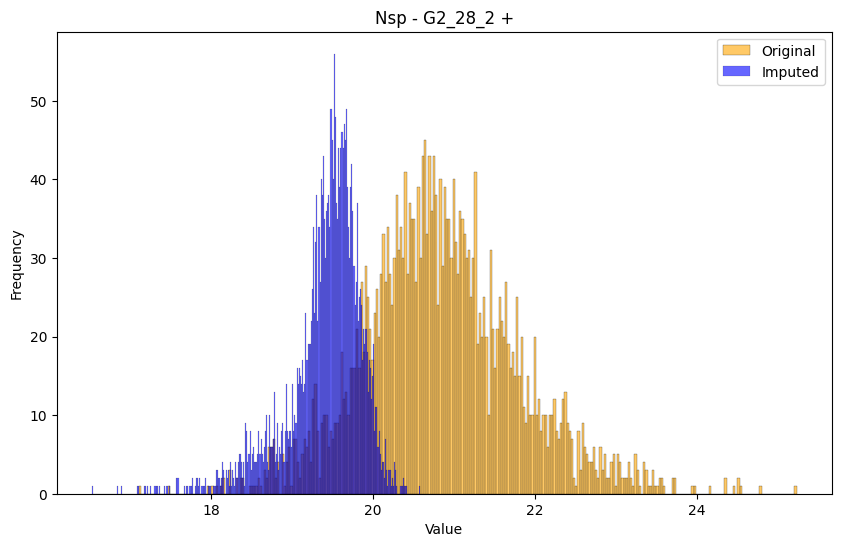

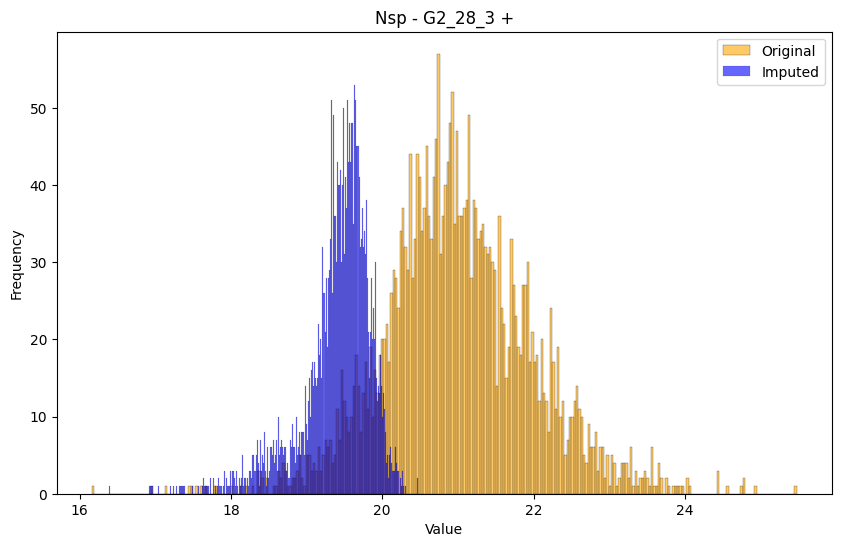

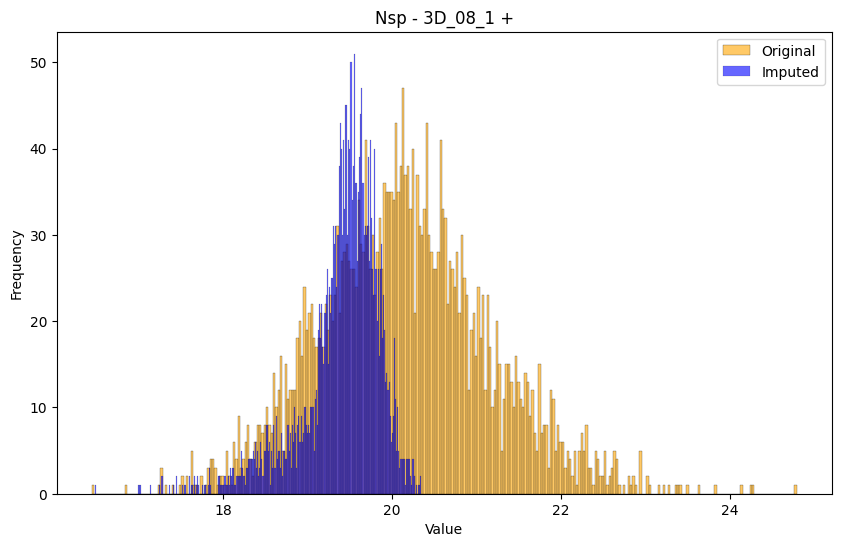

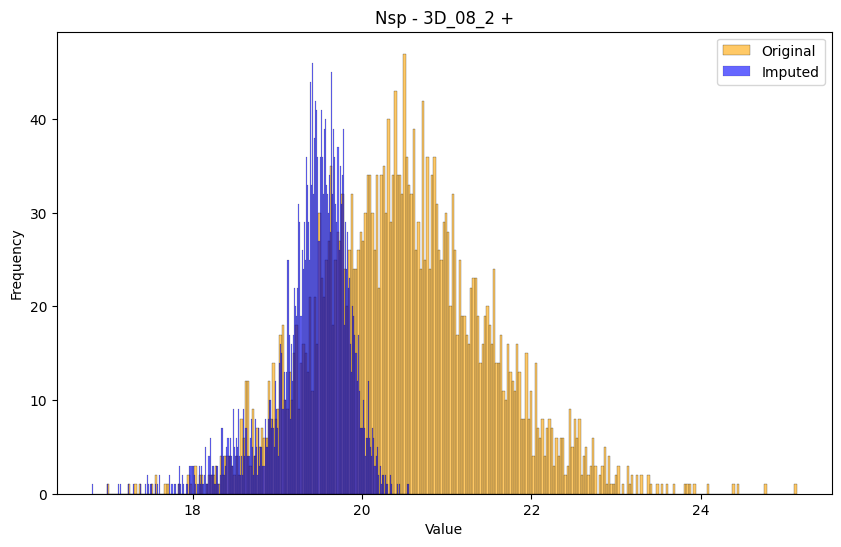

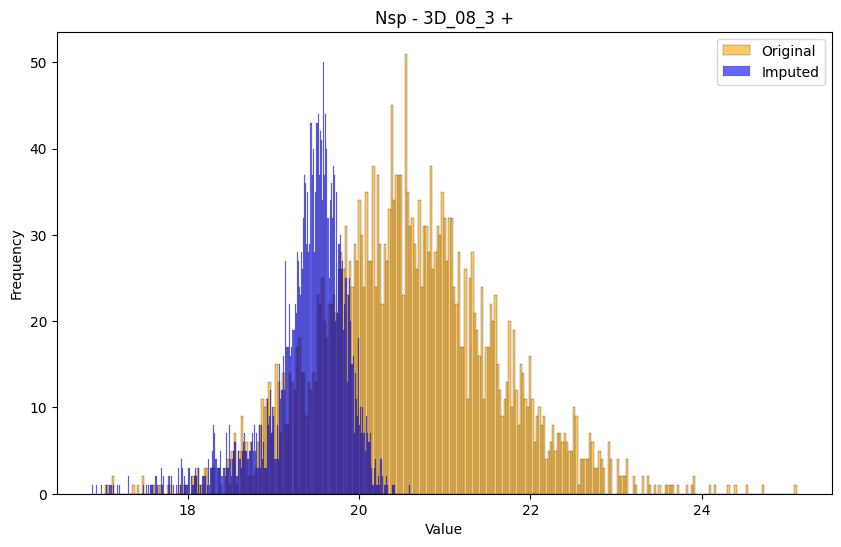

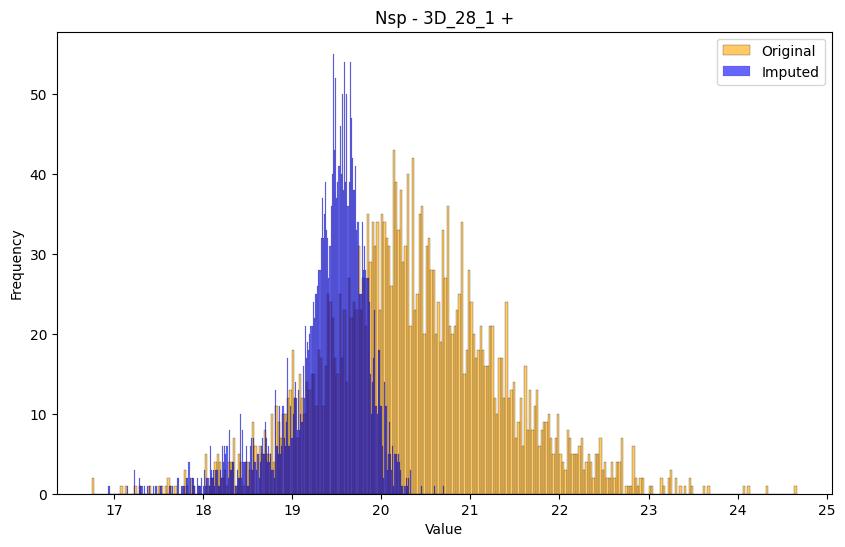

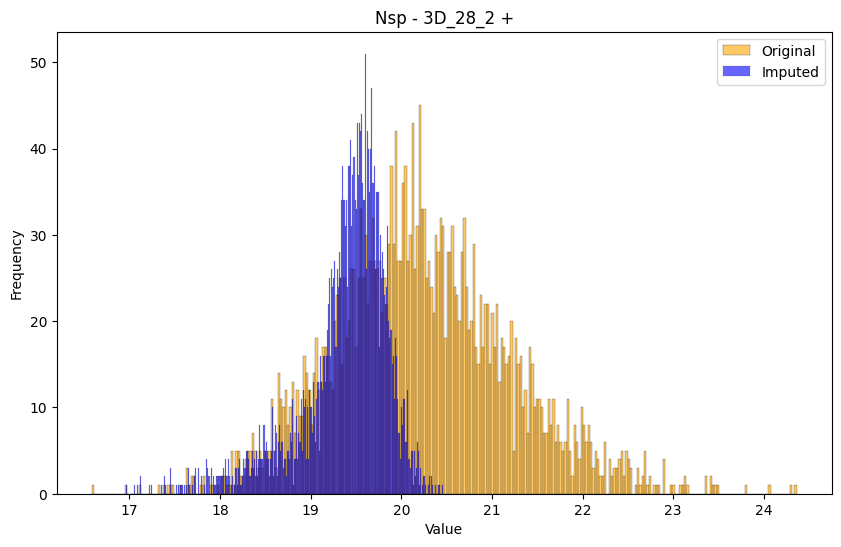

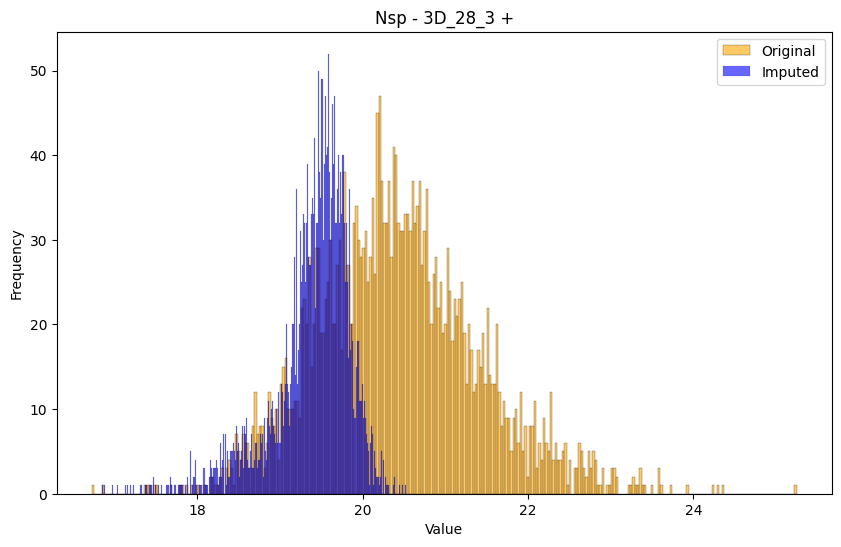

Folder reports created successfully at G:/My Drive/Data/data/20240306 eIF 5 lines/3D new pipeline//statistics/imputed


In [44]:

light, nsp = imputation.perform_imputation(path,normalization_groups, meta)

In [45]:
ttest.ttest(path, meta, ttest_groups)
# path = 'G:/My Drive/Data/data/20240306 eIF 5 lines/3d G3 G2/protein_groups_filtered/imputed/ttest results/'


C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-26 14:58:49,391 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full
C:\Users\robbi\AppData\Local\miniconda3\envs\full_pipeline\lib\site-packages\alphastats\loader\BaseLoader.py:69: DeprecationWarning:

Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.

2024-04-26 14:58:49,463 - root - INFO - Column 'contamination_library' has been added, to indicate contaminations.
The contaminant library was created by Frankenfield et al.:https://www.biorxiv.org/content/10.1101/2022.04.27.489766v2.full


DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Data has been log2-transformed.
Data has been log2-transformed.
Folder reports created successfully at G:/My Drive/Data/data/20240306 eIF 5 lines/3D new pipeline//statistics/ttest results
Folder reports

['3D08_light.csv', '3D08_nsp.csv', '3D28_light.csv', '3D28_nsp.csv']


2024-04-26 14:59:00,204 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,206 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,511 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,513 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,549 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,551 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,664 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,666 - matplotlib.text - WARNING - posx and posy should be finite values


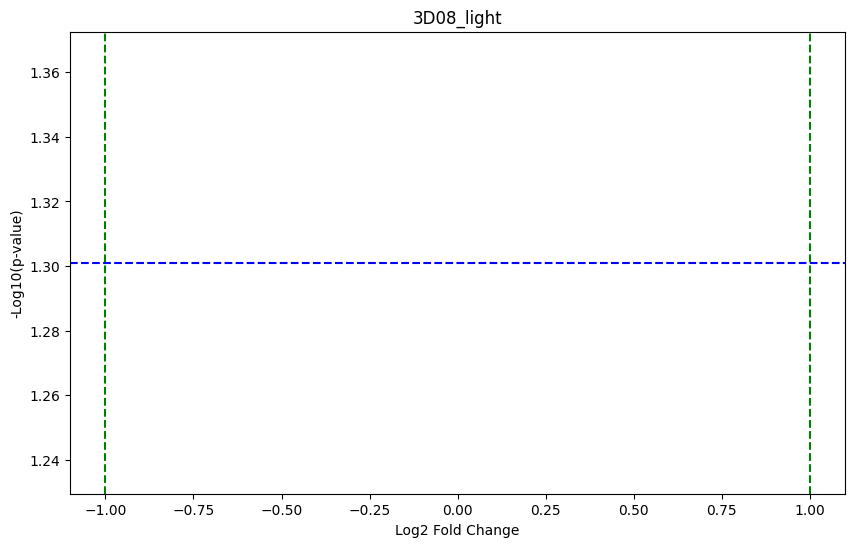

2024-04-26 14:59:00,871 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:00,872 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,183 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,185 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,222 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,223 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,341 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,343 - matplotlib.text - WARNING - posx and posy should be finite values


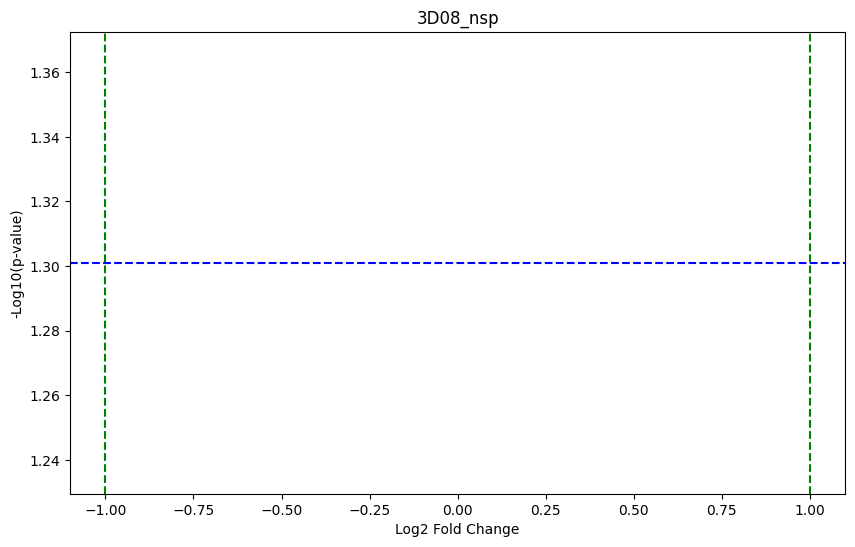

2024-04-26 14:59:01,543 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,545 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,849 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,851 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,886 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:01,887 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,005 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,007 - matplotlib.text - WARNING - posx and posy should be finite values


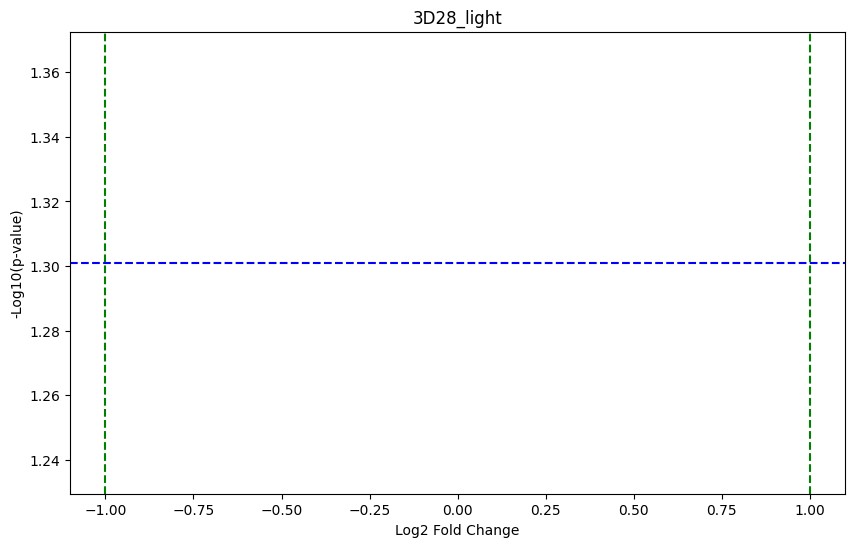

2024-04-26 14:59:02,210 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,212 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,521 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,523 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,559 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,560 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,682 - matplotlib.text - WARNING - posx and posy should be finite values
2024-04-26 14:59:02,684 - matplotlib.text - WARNING - posx and posy should be finite values


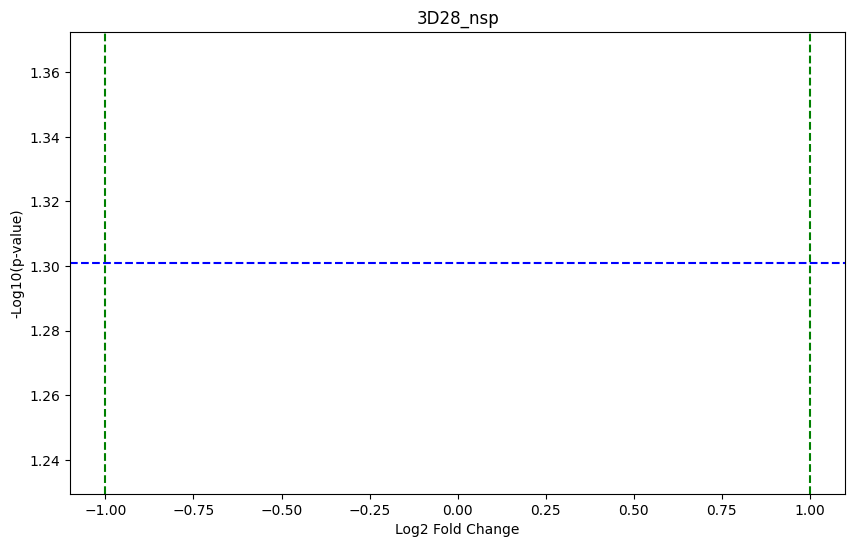

In [46]:
pois = ["SRP54", "SRP68", "SRP72"]
pois = ['FTL','FTH1', 'TFRC']
loop_and_plot_results(path, pois, interactive=False, uniprot=False)